## Understanding of Image Segmentation

Suppose you want to know the shape of the object in an image, which pixel belongs to which object, etc, you need to assign a class to each pixel of the image - this task is known as segmentation.

A segmented model returns much more detailed information about the image. Some applications of image segmentation are in medical imaging, self-driving cars and satellite imaging, just to name a few.

This project uses the OXford-IIIT Pet Dataset(Parkhi et al, 2012). The dataset consists of images of 37 pet breeds, with 200 image per breed(~100 each in the training and test splits). Each image includes the corresponding labels, and pixel-wise masks. The masks are class-labels for each pixel. Each pixel is given one of three categories:
    
    1. Class 1: Pixel belonging to the pet
    
    2. Class 2: Pixel bordering the pet.
    
    3. Class 3: None of the above/a surrounding pixel

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

C:\Users\ojare\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt

### Download the Oxford-IIT Pets dataset

The dataset is available from TensorFlow Datasets. The segmentation masks are included in version 3+

In [3]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                                                             | 0/18 [00:03<?, ? MiB/s]

Dl Size...:   0%|                                                                            | 0/773 [00:03<?, ? MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:   0%|                                                                  | 1/773 [00:05<1:08:47,  5.35s/ MiB]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:   0%|▏                                                                   | 2/773 [00:05<30:39,  2.39s/ MiB]

Extraction completed...: 0 f

Extraction completed...: 0 file [00:32, ? file/s]
Dl Size...:   3%|██▏                                                                | 25/773 [00:34<25:33,  2.05s/ MiB]

Extraction completed...: 0 file [00:34, ? file/s]
Dl Size...:   3%|██▎                                                                | 26/773 [00:35<24:10,  1.94s/ MiB]

Extraction completed...: 0 file [00:35, ? file/s]
Dl Size...:   3%|██▎                                                                | 27/773 [00:38<26:37,  2.14s/ MiB]

Extraction completed...: 0 file [00:38, ? file/s]
Dl Size...:   4%|██▍                                                                | 28/773 [00:40<27:49,  2.24s/ MiB]

Extraction completed...: 0 file [00:40, ? file/s]
Dl Size...:   4%|██▌                                                                | 29/773 [00:43<30:25,  2.45s/ MiB]

Extraction completed...: 0 file [00:43, ? file/s]
Dl Size...:   4%|██▌                                                                | 30/773 [0

Dl Size...:   5%|███▋                                                               | 42/773 [01:08<21:32,  1.77s/ MiB]

Dl Size...:   5%|███▋                                                               | 42/773 [01:08<21:32,  1.77s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:08<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:08<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋           

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:09<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:10<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:10<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:10<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▋                                                               | 43/773 [01:10<19:07,  1.57s/ MiB]

Dl Size...:   6%|███▊                                                               | 44/773 [01:10<17:50,  1.47s/ MiB]

Dl Size...:   6%|███▊                                                               | 44/773 [01:10<17:50,  1.47s/ MiB]

Dl Size...:   6%|███▊           

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉                                                               | 45/773 [01:11<15:29,  1.28s/ MiB]

Dl Size...:   6%|███▉           

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉                                                               | 46/773 [01:12<14:35,  1.20s/ MiB]

Dl Size...:   6%|███▉           

Dl Size...:   6%|███▉                                                               | 46/773 [01:13<14:35,  1.20s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:13<16:33,  1.37s/ MiB]

Dl Size...:   6%|████           

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████                                                               | 47/773 [01:15<16:33,  1.37s/ MiB]

Dl Size...:   6%|████           

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:16<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:17<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:18<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 48/773 [01:19<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:19<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:19<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:19<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:20<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:20<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:20<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏                                                              | 48/773 [01:20<18:42,  1.55s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:20<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:22<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏                                                              | 49/773 [01:23<30:05,  2.49s/ MiB]

Dl Size...:   6%|████▏          

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:24<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎          

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:25<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎          

Dl Size...:   6%|████▎                                                              | 50/773 [01:26<35:05,  2.91s/ MiB]

Dl Size...:   6%|████▎                                                              | 50/773 [01:26<35:05,  2.91s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:26<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍          

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍                                                              | 51/773 [01:27<31:10,  2.59s/ MiB]

Dl Size...:   7%|████▍          

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:28<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌          

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌          

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌                                                              | 52/773 [01:29<29:36,  2.46s/ MiB]

Dl Size...:   7%|████▌          

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:31<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌          

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌                                                              | 53/773 [01:32<29:42,  2.48s/ MiB]

Dl Size...:   7%|████▌          

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:33<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋          

Dl Size...:   7%|████▋                                                              | 54/773 [01:34<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:34<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:35<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▋                                                              | 54/773 [01:35<29:22,  2.45s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:35<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:35<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:35<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:35<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:37<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:38<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊                                                              | 55/773 [01:39<28:52,  2.41s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:40<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊                                                              | 56/773 [01:41<36:17,  3.04s/ MiB]

Dl Size...:   7%|████▊          

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:42<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉          

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:43<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉          

Dl Size...:   7%|████▉                                                              | 57/773 [01:44<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:44<32:38,  2.73s/ MiB]

Dl Size...:   7%|████▉                                                              | 57/773 [01:44<32:38,  2.73s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████          

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:44<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████          

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████                                                              | 58/773 [01:46<30:19,  2.54s/ MiB]

Dl Size...:   8%|█████          

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████          

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:47<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████                                                              | 59/773 [01:48<29:51,  2.51s/ MiB]

Dl Size...:   8%|█████          

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:48<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏         

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏                                                             | 60/773 [01:49<27:58,  2.35s/ MiB]

Dl Size...:   8%|█████▏         

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:51<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎         

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎                                                             | 61/773 [01:52<27:38,  2.33s/ MiB]

Dl Size...:   8%|█████▎         

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:53<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎         

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎                                                             | 62/773 [01:54<26:32,  2.24s/ MiB]

Dl Size...:   8%|█████▎         

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍                                                             | 63/773 [01:57<25:49,  2.18s/ MiB]

Dl Size...:   8%|█████▍         

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [01:58<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌         

Dl Size...:   8%|█████▌                                                             | 64/773 [02:00<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [02:00<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [02:00<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [02:00<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▌                                                             | 64/773 [02:00<27:07,  2.30s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:00<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:00<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:00<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋         

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:01<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋         

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋                                                             | 65/773 [02:02<28:41,  2.43s/ MiB]

Dl Size...:   8%|█████▋         

Dl Size...:   9%|█████▋                                                             | 66/773 [02:03<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:03<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋                                                             | 66/773 [02:04<29:05,  2.47s/ MiB]

Dl Size...:   9%|█████▋         

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:05<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊                                                             | 67/773 [02:06<29:53,  2.54s/ MiB]

Dl Size...:   9%|█████▊         

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:07<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉         

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉                                                             | 68/773 [02:08<25:51,  2.20s/ MiB]

Dl Size...:   9%|█████▉         

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉                                                             | 69/773 [02:09<25:02,  2.13s/ MiB]

Dl Size...:   9%|█████▉         

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:11<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████         

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████                                                             | 70/773 [02:12<25:08,  2.15s/ MiB]

Dl Size...:   9%|██████         

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:13<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏        

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:14<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏        

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏                                                            | 71/773 [02:15<25:38,  2.19s/ MiB]

Dl Size...:   9%|██████▏        

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:16<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏        

Dl Size...:   9%|██████▏                                                            | 72/773 [02:18<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:18<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:18<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:18<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:19<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:19<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:19<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏                                                            | 72/773 [02:19<28:12,  2.41s/ MiB]

Dl Size...:   9%|██████▏        

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:21<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:22<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎                                                            | 73/773 [02:22<35:18,  3.03s/ MiB]

Dl Size...:   9%|██████▎        

Dl Size...:  10%|██████▍                                                            | 74/773 [02:23<31:24,  2.70s/ MiB]

Dl Size...:  10%|██████▍                                                            | 74/773 [02:23<31:24,  2.70s/ MiB]

Dl Size...:  10%|██████▍                                                            | 74/773 [02:23<31:24,  2.70s/ MiB]

Dl Size...:  10%|██████▍                                                            | 74/773 [02:23<31:24,  2.70s/ MiB]

Dl Size...:  10%|██████▌                                                            | 75/773 [02:24<27:22,  2.35s/ MiB]

Dl Size...:  10%|██████▌                                                            | 75/773 [02:24<27:22,  2.35s/ MiB]

Dl Size...:  10%|██████▌                                                            | 75/773 [02:24<27:22,  2.35s/ MiB]

Dl Size...:  10%|██████▌                                                            | 75/773 [02:24<27:22,  2.35s/ MiB]

Dl Size...:  10%|██████▌        

Dl Size...:  10%|██████▌                                                            | 76/773 [02:25<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:25<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:25<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌        

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:26<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:27<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌                                                            | 76/773 [02:27<24:35,  2.12s/ MiB]

Dl Size...:  10%|██████▌        

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋                                                            | 77/773 [02:28<22:49,  1.97s/ MiB]

Dl Size...:  10%|██████▋        

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:29<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:30<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊        

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊                                                            | 78/773 [02:31<24:25,  2.11s/ MiB]

Dl Size...:  10%|██████▊        

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:32<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊        

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊                                                            | 79/773 [02:33<25:28,  2.20s/ MiB]

Dl Size...:  10%|██████▊        

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉        

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉                                                            | 80/773 [02:35<26:21,  2.28s/ MiB]

Dl Size...:  10%|██████▉        

Dl Size...:  10%|███████                                                            | 81/773 [02:36<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:36<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:36<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:36<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:36<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:37<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:37<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████                                                            | 81/773 [02:37<25:37,  2.22s/ MiB]

Dl Size...:  10%|███████        

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████                                                            | 82/773 [02:39<25:06,  2.18s/ MiB]

Dl Size...:  11%|███████        

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:41<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏       

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏                                                           | 83/773 [02:43<25:34,  2.22s/ MiB]

Dl Size...:  11%|███████▏       

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:44<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎       

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎                                                           | 84/773 [02:45<26:48,  2.33s/ MiB]

Dl Size...:  11%|███████▎       

Dl Size...:  11%|███████▎                                                           | 85/773 [02:46<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:46<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎                                                           | 85/773 [02:47<25:40,  2.24s/ MiB]

Dl Size...:  11%|███████▎       

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍                                                           | 86/773 [02:48<24:50,  2.17s/ MiB]

Dl Size...:  11%|███████▍       

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:50<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌       

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌                                                           | 87/773 [02:51<25:08,  2.20s/ MiB]

Dl Size...:  11%|███████▌       

Dl Size...:  11%|███████▋                                                           | 88/773 [02:52<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:52<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:52<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:53<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:53<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:53<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:53<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋                                                           | 88/773 [02:53<24:46,  2.17s/ MiB]

Dl Size...:  11%|███████▋       

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:54<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋       

Dl Size...:  12%|███████▋                                                           | 89/773 [02:55<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:55<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:55<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:55<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:55<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▋                                                           | 89/773 [02:56<24:37,  2.16s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:56<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:56<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊       

Dl Size...:  12%|███████▊                                                           | 90/773 [02:56<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:56<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:56<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:57<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:57<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:57<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:57<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊                                                           | 90/773 [02:57<23:03,  2.03s/ MiB]

Dl Size...:  12%|███████▊       

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:58<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉       

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉                                                           | 91/773 [02:59<22:39,  1.99s/ MiB]

Dl Size...:  12%|███████▉       

Dl Size...:  12%|███████▉                                                           | 92/773 [03:00<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:00<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:01<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉       

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉                                                           | 92/773 [03:02<25:08,  2.22s/ MiB]

Dl Size...:  12%|███████▉       

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:04<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████       

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:05<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████       

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████                                                           | 93/773 [03:06<26:25,  2.33s/ MiB]

Dl Size...:  12%|████████       

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:07<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏      

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 94/773 [03:09<30:41,  2.71s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:09<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:09<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏      

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏                                                          | 95/773 [03:10<29:57,  2.65s/ MiB]

Dl Size...:  12%|████████▏      

Dl Size...:  12%|████████▎                                                          | 96/773 [03:11<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:11<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:11<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:11<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:11<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:12<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:12<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎                                                          | 96/773 [03:12<26:46,  2.37s/ MiB]

Dl Size...:  12%|████████▎      

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:12<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍      

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 97/773 [03:14<23:55,  2.12s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:14<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:14<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍      

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍                                                          | 98/773 [03:15<23:42,  2.11s/ MiB]

Dl Size...:  13%|████████▍      

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:16<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:17<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:17<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌      

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌                                                          | 99/773 [03:18<22:19,  1.99s/ MiB]

Dl Size...:  13%|████████▌      

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:20<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌      

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 100/773 [03:21<25:05,  2.24s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:21<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:21<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌      

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌                                                         | 101/773 [03:23<24:59,  2.23s/ MiB]

Dl Size...:  13%|████████▌      

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:24<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋      

Dl Size...:  13%|████████▋                                                         | 102/773 [03:25<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:25<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:25<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:25<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▋                                                         | 102/773 [03:25<25:48,  2.31s/ MiB]

Dl Size...:  13%|████████▊                                                         | 103/773 [03:25<24:16,  2.17s/ MiB]

Dl Size...:  13%|████████▊                                                         | 103/773 [03:25<24:16,  2.17s/ MiB]

Dl Size...:  13%|████████▊                                                         | 103/773 [03:25<24:16,  2.17s/ MiB]

Dl Size...:  13%|████████▊      

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉                                                         | 104/773 [03:27<21:15,  1.91s/ MiB]

Dl Size...:  13%|████████▉      

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉                                                         | 105/773 [03:29<19:24,  1.74s/ MiB]

Dl Size...:  14%|████████▉      

Dl Size...:  14%|█████████                                                         | 106/773 [03:29<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████                                                         | 106/773 [03:30<17:40,  1.59s/ MiB]

Dl Size...:  14%|█████████      

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏                                                        | 108/773 [03:32<15:08,  1.37s/ MiB]

Dl Size...:  14%|█████████▏     

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎                                                        | 109/773 [03:33<14:27,  1.31s/ MiB]

Dl Size...:  14%|█████████▎     

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:34<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:34<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:34<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:34<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:34<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:35<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:35<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 110/773 [03:35<13:57,  1.26s/ MiB]

Dl Size...:  14%|█████████▍     

Dl Size...:  14%|█████████▍                                                        | 111/773 [03:36<12:38,  1.15s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 111/773 [03:36<12:38,  1.15s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 111/773 [03:36<12:38,  1.15s/ MiB]

Dl Size...:  14%|█████████▍                                                        | 111/773 [03:36<12:38,  1.15s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:36<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:36<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:36<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:36<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌     

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:36<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌                                                        | 112/773 [03:37<11:21,  1.03s/ MiB]

Dl Size...:  14%|█████████▌     

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 113/773 [03:37<11:27,  1.04s/ MiB]

Dl Size...:  15%|█████████▋     

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:38<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋                                                        | 114/773 [03:39<11:30,  1.05s/ MiB]

Dl Size...:  15%|█████████▋     

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:39<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊     

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊     

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▊                                                        | 115/773 [03:40<11:26,  1.04s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:40<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 116/773 [03:41<12:35,  1.15s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:42<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉     

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:43<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:43<13:08,  1.20s/ MiB]

Dl Size...:  15%|█████████▉                                                        | 117/773 [03:43<13:08,  1.20s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:43<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:43<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:43<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:43<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:43<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████     

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████                                                        | 118/773 [03:44<13:20,  1.22s/ MiB]

Dl Size...:  15%|██████████     

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:44<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏    

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏                                                       | 119/773 [03:45<13:26,  1.23s/ MiB]

Dl Size...:  15%|██████████▏    

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏    

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏                                                       | 120/773 [03:46<13:06,  1.20s/ MiB]

Dl Size...:  16%|██████████▏    

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:47<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▎    

Dl Size...:  16%|██████████▎                                                       | 121/773 [03:48<13:01,  1.20s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍    

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍                                                       | 122/773 [03:48<12:30,  1.15s/ MiB]

Dl Size...:  16%|██████████▍    

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:49<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌    

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 123/773 [03:50<12:28,  1.15s/ MiB]

Dl Size...:  16%|██████████▌    

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:50<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌    

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌                                                       | 124/773 [03:51<12:43,  1.18s/ MiB]

Dl Size...:  16%|██████████▌    

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:51<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:51<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:51<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:51<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋    

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋                                                       | 125/773 [03:52<13:11,  1.22s/ MiB]

Dl Size...:  16%|██████████▋    

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊    

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:53<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊    

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 126/773 [03:54<14:28,  1.34s/ MiB]

Dl Size...:  16%|██████████▊    

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:55<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊    

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊                                                       | 127/773 [03:56<14:53,  1.38s/ MiB]

Dl Size...:  16%|██████████▊    

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:56<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉    

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉                                                       | 128/773 [03:57<15:14,  1.42s/ MiB]

Dl Size...:  17%|██████████▉    

Dl Size...:  17%|███████████                                                       | 129/773 [03:57<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:57<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:57<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:58<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [03:59<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [04:00<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [04:00<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [04:00<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████                                                       | 129/773 [04:00<15:39,  1.46s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:00<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:01<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:02<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:03<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████                                                       | 130/773 [04:04<18:02,  1.68s/ MiB]

Dl Size...:  17%|███████████    

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:04<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:04<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:04<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:05<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:06<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:07<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:08<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏                                                      | 131/773 [04:09<27:28,  2.57s/ MiB]

Dl Size...:  17%|███████████▏   

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:09<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎   

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:10<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎   

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎   

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 132/773 [04:11<34:48,  3.26s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:11<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:11<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎   

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:12<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎   

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:13<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▎                                                      | 133/773 [04:13<31:48,  2.98s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍   

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:13<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍   

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▍   

Dl Size...:  17%|███████████▍                                                      | 134/773 [04:14<25:57,  2.44s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:14<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌   

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌                                                      | 135/773 [04:15<23:50,  2.24s/ MiB]

Dl Size...:  17%|███████████▌   

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌                                                      | 136/773 [04:16<20:04,  1.89s/ MiB]

Dl Size...:  18%|███████████▌   

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:16<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:16<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:16<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:16<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:16<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋   

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:17<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋   

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋   

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:18<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▋   

Dl Size...:  18%|███████████▋                                                      | 137/773 [04:19<16:28,  1.55s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊                                                      | 138/773 [04:19<20:11,  1.91s/ MiB]

Dl Size...:  18%|███████████▊   

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████                                                      | 142/773 [04:28<19:08,  1.82s/ MiB]

Dl Size...:  18%|████████████   

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:28<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏  

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏  

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:29<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:30<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:30<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:30<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏                                                     | 143/773 [04:30<18:51,  1.80s/ MiB]

Dl Size...:  18%|████████████▏  

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:30<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎  

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎                                                     | 144/773 [04:31<18:35,  1.77s/ MiB]

Dl Size...:  19%|████████████▎  

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:31<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:32<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:33<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 145/773 [04:34<18:09,  1.74s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:34<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:35<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍                                                     | 146/773 [04:36<21:07,  2.02s/ MiB]

Dl Size...:  19%|████████████▍  

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:37<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌  

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌  

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:38<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌  

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌                                                     | 147/773 [04:39<22:40,  2.17s/ MiB]

Dl Size...:  19%|████████████▌  

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 148/773 [04:39<24:04,  2.31s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋  

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:44<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋  

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋  

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:45<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋  

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:46<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋  

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▋                                                     | 149/773 [04:47<26:43,  2.57s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:47<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:48<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:49<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:50<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊                                                     | 150/773 [04:51<32:52,  3.17s/ MiB]

Dl Size...:  19%|████████████▊  

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:51<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉  

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉  

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:52<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:53<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:53<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:53<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:53<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 151/773 [04:53<35:09,  3.39s/ MiB]

Dl Size...:  20%|████████████▉  

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:53<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉  

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉                                                     | 152/773 [04:54<31:04,  3.00s/ MiB]

Dl Size...:  20%|████████████▉  

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████  

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:55<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████  

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:56<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████  

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████                                                     | 153/773 [04:57<26:59,  2.61s/ MiB]

Dl Size...:  20%|█████████████  

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:57<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:57<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:57<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:57<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:57<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:58<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [04:59<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 154/773 [05:00<26:46,  2.60s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:01<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏                                                    | 155/773 [05:02<26:59,  2.62s/ MiB]

Dl Size...:  20%|█████████████▏ 

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎ 

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:03<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎ 

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎ 

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:04<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎ 

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎                                                    | 156/773 [05:05<27:22,  2.66s/ MiB]

Dl Size...:  20%|█████████████▎ 

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:06<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:07<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 157/773 [05:08<28:09,  2.74s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍                                                    | 158/773 [05:09<28:17,  2.76s/ MiB]

Dl Size...:  20%|█████████████▍ 

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋ 

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋                                                    | 161/773 [05:16<23:57,  2.35s/ MiB]

Dl Size...:  21%|█████████████▋ 

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊ 

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:18<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊ 

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▊                                                    | 162/773 [05:19<22:38,  2.22s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:19<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:19<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:19<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉ 

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉ 

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:20<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉ 

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉                                                    | 163/773 [05:21<23:04,  2.27s/ MiB]

Dl Size...:  21%|█████████████▉ 

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:22<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████                                                    | 164/773 [05:23<22:25,  2.21s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████                                                    | 165/773 [05:24<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████                                                    | 165/773 [05:25<22:12,  2.19s/ MiB]

Dl Size...:  21%|██████████████ 

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:26<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏                                                   | 166/773 [05:27<21:38,  2.14s/ MiB]

Dl Size...:  21%|██████████████▏

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▎                                                   | 167/773 [05:28<20:44,  2.05s/ MiB]

Dl Size...:  22%|██████████████▍                                                   | 169/773 [05:35<22:19,  2.22s/ MiB]

Dl Size...:  22%|██████████████▍                                                   | 169/773 [05:35<22:19,  2.22s/ MiB]

Dl Size...:  22%|██████████████▍

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:35<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:36<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:37<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 170/773 [05:38<24:29,  2.44s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:38<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:39<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌                                                   | 171/773 [05:40<26:01,  2.59s/ MiB]

Dl Size...:  22%|██████████████▌

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:40<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:41<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:42<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋                                                   | 172/773 [05:43<26:11,  2.62s/ MiB]

Dl Size...:  22%|██████████████▋

Dl Size...:  23%|███████████████▎                                                  | 180/773 [05:56<14:19,  1.45s/ MiB]

Dl Size...:  23%|███████████████▎                                                  | 180/773 [05:56<14:19,  1.45s/ MiB]

Dl Size...:  23%|███████████████▎                                                  | 180/773 [05:56<14:19,  1.45s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:56<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:56<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:56<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:56<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:56<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  23%|███████████████▍                                                  | 181/773 [05:57<14:05,  1.43s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:57<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:57<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:57<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:57<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:58<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 182/773 [05:59<13:44,  1.40s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [05:59<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:00<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:01<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:01<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:01<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:01<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▌                                                  | 183/773 [06:01<14:18,  1.46s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:01<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████▋                                                  | 184/773 [06:02<15:00,  1.53s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Extraction completed...:   0%|                                                            | 0/11080 [06:03<?, ? file/s]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:03<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Extraction completed...:   0%|                                                | 28/11080 [06:04<19:34:47,  6.38s/ file]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Extraction completed...:   1%|▎                                                | 58/11080 [06:04<2:25:42,  1.26 file/s]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████▊                                                  | 185/773 [06:04<15:38,  1.60s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Extraction completed...:   1%|▍                                                  | 86/11080 [06:05<28:32,  6.42 file/s]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Extraction completed...:   1%|▌                                                 | 116/11080 [06:05<07:32, 24.21 file/s]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████▉                                                  | 186/773 [06:05<16:09,  1.65s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|███████████████▉                                                  | 187/773 [06:06<16:00,  1.64s/ MiB]

Dl Completed...:  50%|████████████████████████████████▌                                | 1/2 [06:06<01:08, 68.54s/ url]


Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Extraction completed...:   5%|██▎                                               | 500/11080 [06:13<03:33, 49.53 file/s]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|██████████████

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Extraction completed...:   5%|██▍                                               | 530/11080 [06:13<03:24, 51.52 file/s]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:13<24:16,  2.49s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Extraction completed...:   5%|██▌                                               | 562/11080 [06:14<03:22, 51.93 file/s]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|████████████████                                                  | 188/773 [06:14<24:16,  2.49s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Extraction completed...:   5%|██▋                                               | 587/11080 [06:15<03:23, 51.53 file/s]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Extraction completed...:   6%|██▊                                               | 621/11080 [06:15<03:01, 57.61 file/s]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:15<28:28,  2.92s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Extraction completed...:   6%|██▉                                               | 650/11080 [06:16<04:02, 43.08 file/s]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Extraction completed...:   6%|███                                               | 681/11080 [06:16<03:08, 55.25 file/s]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:16<28:28,  2.92s/ MiB]

Dl Size...:  24%|███████████████

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Extraction completed...:   6%|███▏                                              | 712/11080 [06:17<03:18, 52.35 file/s]

Dl Size...:  24%|████████████████▏                                                 | 189/773 [06:17<28:28,  2.92s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Extraction completed...:   7%|███▎                                              | 739/11080 [06:18<04:12, 40.91 file/s]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Extraction completed...:   7%|███▍                                              | 770/11080 [06:18<03:13, 53.16 file/s]

Dl Size...:  25%|████████████████▏                                                 | 190/773 [06:18<27:39,  2.85s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Extraction completed...:   7%|███▌                                              | 797/11080 [06:19<04:27, 38.43 file/s]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:19<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Extraction completed...:   7%|███▋                                              | 826/11080 [06:20<03:34, 47.87 file/s]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Dl Size...:  25%|████████████████▎                                                 | 191/773 [06:20<23:25,  2.42s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Extraction completed...:   8%|███▊                                              | 855/11080 [06:20<04:06, 41.54 file/s]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:20<20:47,  2.15s/ MiB]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Extraction completed...:   8%|███▉                                              | 882/11080 [06:21<03:29, 48.62 file/s]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 192/773 [06:21<20:47,  2.15s/ MiB]

Extraction completed...:   8%|████                                              | 887/11080 [06:21<03:30, 48.51 file/s]

Dl Size...:  25%|███████████████

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Extraction completed...:   8%|████                                              | 912/11080 [06:21<03:36, 46.87 file/s]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:21<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|███████████████

Extraction completed...:   8%|████▏                                             | 939/11080 [06:22<03:25, 49.45 file/s]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▍                                                 | 193/773 [06:22<17:33,  1.82s/ MiB]

Dl Size...:  25%|████████████████▌                                                 | 194/773 [06:22<16:21,  1.69s/ MiB]

Extraction completed...:   9%|████▎                                             | 944/11080 [06:22<03:37, 46.53 file/s]

Dl Size...:  25%|███████████████

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Extraction completed...:  12%|█████▊                                           | 1325/11080 [06:30<03:10, 51.29 file/s]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:30<13:17,  1.39s/ MiB]

Extraction completed...:  12%|██

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Extraction completed...:  12%|█████▉                                           | 1355/11080 [06:31<03:13, 50.29 file/s]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Extraction completed...:  12%|██

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Extraction completed...:  13%|██████▏                                          | 1387/11080 [06:31<02:42, 59.64 file/s]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|████████████████▉                                                 | 199/773 [06:31<13:17,  1.39s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:31<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:31<16:34,  1.74s/ MiB]

Dl Size...:  26%|███████████████

Extraction completed...:  13%|██████▏                                          | 1413/11080 [06:32<02:48, 57.51 file/s]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Extraction completed...:  13%|██

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Extraction completed...:  13%|██████▍                                          | 1448/11080 [06:32<03:19, 48.20 file/s]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:32<16:34,  1.74s/ MiB]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Extraction completed...:  13%|██████▌                                          | 1474/11080 [06:33<02:54, 55.15 file/s]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:33<16:34,  1.74s/ MiB]

Extraction completed...:  13%|██

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Extraction completed...:  14%|██████▋                                          | 1507/11080 [06:34<03:09, 50.65 file/s]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:34<16:34,  1.74s/ MiB]

Extraction completed...:  14%|██████▊                                          | 1540/11080 [06:34<03:48, 41.68 file/s]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████                                                 | 200/773 [06:35<16:34,  1.74s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Extraction completed...:  14%|██████▉                                          | 1565/11080 [06:35<03:14, 48.97 file/s]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:35<21:54,  2.30s/ MiB]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Extraction completed...:  14%|███████                                          | 1596/11080 [06:36<04:44, 33.29 file/s]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Extraction completed...:  15%|███████▏                                         | 1628/11080 [06:36<02:47, 56.39 file/s]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:36<21:54,  2.30s/ MiB]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Extraction completed...:  15%|███████▎                                         | 1653/11080 [06:37<02:43, 57.53 file/s]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:37<21:54,  2.30s/ MiB]

Extraction completed...:  15%|██

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Extraction completed...:  15%|███████▍                                         | 1687/11080 [06:38<03:23, 46.19 file/s]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 201/773 [06:38<21:54,  2.30s/ MiB]

Dl Size...:  26%|███████████████

Extraction completed...:  15%|███████▌                                         | 1711/11080 [06:38<03:12, 48.72 file/s]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:38<23:35,  2.48s/ MiB]

Extraction completed...:  15%|███████▌                                         | 1717/11080 [06:38<03:08, 49.78 file/s]

Dl Size...:  26%|███████████████

Extraction completed...:  16%|███████▋                                         | 1741/11080 [06:39<03:06, 50.04 file/s]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Extraction completed...:  16%|███████▋                                         | 1747/11080 [06:39<02:59, 52.05 file/s]

Dl Size...:  26%|███████████████

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Extraction completed...:  16%|███████▊                                         | 1772/11080 [06:39<02:51, 54.20 file/s]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  26%|█████████████████▏                                                | 202/773 [06:39<23:35,  2.48s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Extraction completed...:  20%|█████████▊                                       | 2216/11080 [06:48<02:47, 52.97 file/s]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|█████████████████▌                                                | 206/773 [06:48<20:20,  2.15s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Extraction completed...:  20%|█████████▉                                       | 2246/11080 [06:49<03:08, 46.76 file/s]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Extraction completed...:  21%|██████████                                       | 2276/11080 [06:49<02:45, 53.08 file/s]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:49<19:46,  2.10s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Extraction completed...:  21%|██████████▏                                      | 2307/11080 [06:50<02:42, 53.85 file/s]

Dl Size...:  27%|█████████████████▋                                                | 207/773 [06:50<19:46,  2.10s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Extraction completed...:  21%|██████████▎                                      | 2331/11080 [06:51<02:53, 50.31 file/s]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Extraction completed...:  21%|██████████▎                                      | 2336/11080 [06:51<03:47, 38.38 file/s]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Extraction completed...:  21%|██████████▍                                      | 2362/11080 [06:51<02:47, 52.07 file/s]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 208/773 [06:51<18:35,  1.97s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Extraction completed...:  22%|██████████▌                                      | 2391/11080 [06:52<03:08, 46.14 file/s]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:52<17:52,  1.90s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Extraction completed...:  22%|██████████▋                                      | 2421/11080 [06:53<03:38, 39.57 file/s]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Extraction completed...:  22%|██████████▊                                      | 2451/11080 [06:53<02:45, 52.29 file/s]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:53<17:52,  1.90s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Extraction completed...:  22%|██████████▉                                      | 2481/11080 [06:54<02:46, 51.64 file/s]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|█████████████████▊                                                | 209/773 [06:54<17:52,  1.90s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Extraction completed...:  23%|███████████                                      | 2513/11080 [06:54<02:24, 59.22 file/s]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:54<18:17,  1.95s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Extraction completed...:  23%|███████████▏                                     | 2543/11080 [06:55<03:55, 36.19 file/s]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:55<18:17,  1.95s/ MiB]

Dl Size...:  27%|███████████████

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Extraction completed...:  23%|███████████▍                                     | 2573/11080 [06:56<03:01, 46.85 file/s]

Dl Size...:  27%|█████████████████▉                                                | 210/773 [06:56<18:17,  1.95s/ MiB]

Dl Size...:  27%|███████████████

Extraction completed...:  27%|█████████████▍                                   | 3043/11080 [07:05<02:35, 51.52 file/s]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:05<22:51,  2.45s/ MiB]

Extraction completed...:  28%|█████████████▍                                   | 3049/11080 [07:05<02:37, 50.99 file/s]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Extraction completed...:  28%|█████████████▌                                   | 3074/11080 [07:06<02:30, 53.22 file/s]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Extraction completed...:  28%|██

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Extraction completed...:  28%|█████████████▋                                   | 3105/11080 [07:06<02:25, 54.84 file/s]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:06<22:51,  2.45s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Extraction completed...:  28%|█████████████▊                                   | 3136/11080 [07:07<02:34, 51.44 file/s]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:07<22:51,  2.45s/ MiB]

Extraction completed...:  29%|██████████████                                   | 3167/11080 [07:07<02:30, 52.65 file/s]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:08<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:08<22:51,  2.45s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 214/773 [07:08<22:51,  2.45s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:08<25:18,  2.72s/ MiB]

Extraction completed...:  29%|██████████████▏                                  | 3198/11080 [07:08<02:38, 49.72 file/s]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Extraction completed...:  29%|██████████████▎                                  | 3226/11080 [07:09<02:12, 59.21 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Extraction completed...:  29%|██████████████▍                                  | 3253/11080 [07:09<02:14, 58.16 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:09<25:18,  2.72s/ MiB]

Extraction completed...:  29%|██

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Extraction completed...:  30%|██████████████▌                                  | 3284/11080 [07:10<02:41, 48.39 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:10<25:18,  2.72s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Extraction completed...:  30%|██████████████▋                                  | 3314/11080 [07:11<03:29, 37.13 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Extraction completed...:  30%|██

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Extraction completed...:  30%|██████████████▊                                  | 3347/11080 [07:11<02:22, 54.34 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:11<25:18,  2.72s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Extraction completed...:  30%|██████████████▉                                  | 3375/11080 [07:12<02:02, 62.95 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|███████████████

Extraction completed...:  31%|███████████████                                  | 3403/11080 [07:12<02:16, 56.39 file/s]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|██████████████████▎                                               | 215/773 [07:12<25:18,  2.72s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Extraction completed...:  31%|███████████████▏                                 | 3436/11080 [07:13<02:07, 60.16 file/s]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Extraction completed...:  31%|███████████████▎                                 | 3464/11080 [07:13<02:24, 52.64 file/s]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:13<30:13,  3.25s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▍                                               | 216/773 [07:14<30:13,  3.25s/ MiB]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Extraction completed...:  35%|█████████████████▍                               | 3929/11080 [07:23<02:35, 45.89 file/s]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Dl Size...:  28%|██████████████████▌                                               | 218/773 [07:23<33:35,  3.63s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Extraction completed...:  36%|█████████████████▌                               | 3959/11080 [07:24<02:10, 54.77 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Extraction completed...:  36%|█████████████████▌                               | 3985/11080 [07:24<02:09, 54.67 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:24<32:47,  3.55s/ MiB]

Extraction completed...:  36%|██

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Extraction completed...:  36%|█████████████████▊                               | 4018/11080 [07:25<02:21, 49.95 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:25<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Extraction completed...:  37%|█████████████████▉                               | 4049/11080 [07:26<02:03, 57.06 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Extraction completed...:  37%|██████████████████                               | 4078/11080 [07:26<02:26, 47.95 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:26<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Extraction completed...:  37%|██████████████████▏                              | 4109/11080 [07:27<02:18, 50.24 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Extraction completed...:  37%|██████████████████▎                              | 4140/11080 [07:27<02:15, 51.10 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:27<32:47,  3.55s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Extraction completed...:  38%|██████████████████▍                              | 4165/11080 [07:28<02:11, 52.54 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Extraction completed...:  38%|██

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Extraction completed...:  38%|██████████████████▌                              | 4195/11080 [07:28<02:16, 50.49 file/s]

Dl Size...:  28%|██████████████████▋                                               | 219/773 [07:28<32:47,  3.55s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:28<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:28<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:28<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:28<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:28<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Extraction completed...:  38%|██████████████████▋                              | 4225/11080 [07:29<02:14, 50.95 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:29<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Extraction completed...:  38%|██████████████████▊                              | 4256/11080 [07:30<02:01, 55.98 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Extraction completed...:  39%|██████████████████▉                              | 4284/11080 [07:30<02:37, 43.02 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:30<36:05,  3.92s/ MiB]

Extraction completed...:  39%|██

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Extraction completed...:  39%|███████████████████                              | 4315/11080 [07:31<02:14, 50.34 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:31<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Extraction completed...:  39%|███████████████████▏                             | 4345/11080 [07:32<02:21, 47.56 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Extraction completed...:  39%|███████████████████▎                             | 4376/11080 [07:32<02:16, 49.29 file/s]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|██████████████████▊                                               | 220/773 [07:32<36:05,  3.92s/ MiB]

Dl Size...:  28%|███████████████

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:43<23:11,  2.54s/ MiB]

Extraction completed...:  45%|██████████████████████                           | 4984/11080 [07:43<02:02, 49.78 file/s]

Dl Size...:  29%|███████████████

Extraction completed...:  45%|██████████████████████▏                          | 5008/11080 [07:44<01:52, 53.88 file/s]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:44<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▏                                              | 225/773 [07:44<23:11,  2.54s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:44<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:44<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:44<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:44<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:44<19:51,  2.18s/ MiB]

Extraction completed...:  45%|██

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Extraction completed...:  45%|██████████████████████▎                          | 5037/11080 [07:45<02:49, 35.63 file/s]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Extraction completed...:  46%|██████████████████████▎                          | 5042/11080 [07:45<02:43, 36.85 file/s]

Dl Size...:  29%|███████████████

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Extraction completed...:  46%|██████████████████████▍                          | 5067/11080 [07:45<02:18, 43.31 file/s]

Dl Size...:  29%|███████████████████▎                                              | 226/773 [07:45<19:51,  2.18s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:45<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:45<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:45<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:45<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:45<17:49,  1.96s/ MiB]

Extraction completed...:  46%|██

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Extraction completed...:  46%|██████████████████████▌                          | 5096/11080 [07:46<01:59, 50.13 file/s]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Extraction completed...:  46%|██

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:46<17:49,  1.96s/ MiB]

Extraction completed...:  46%|██████████████████████▋                          | 5130/11080 [07:46<01:55, 51.52 file/s]

Dl Size...:  29%|███████████████████▍                                              | 227/773 [07:47<17:49,  1.96s/ MiB]

Dl Size...:  29%|███████████████

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Extraction completed...:  47%|██████████████████████▊                          | 5156/11080 [07:47<02:08, 45.98 file/s]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:47<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Extraction completed...:  47%|██████████████████████▉                          | 5188/11080 [07:48<01:46, 55.54 file/s]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████████▍                                              | 228/773 [07:48<16:13,  1.79s/ MiB]

Dl Size...:  29%|███████████████

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Extraction completed...:  47%|███████████████████████                          | 5216/11080 [07:48<02:04, 47.04 file/s]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:48<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Extraction completed...:  47%|███████████████████████▏                         | 5244/11080 [07:49<02:08, 45.41 file/s]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████████▌                                              | 229/773 [07:49<14:52,  1.64s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Extraction completed...:  48%|███████████████████████▎                         | 5273/11080 [07:49<02:01, 47.97 file/s]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:49<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Extraction completed...:  48%|███████████████████████▍                         | 5302/11080 [07:50<01:56, 49.49 file/s]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 230/773 [07:50<13:55,  1.54s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Extraction completed...:  48%|███████████████████████▌                         | 5332/11080 [07:51<01:52, 50.95 file/s]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Extraction completed...:  48%|███████████████████████▋                         | 5362/11080 [07:51<01:54, 49.81 file/s]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████████▋                                              | 231/773 [07:51<13:08,  1.45s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Extraction completed...:  49%|███████████████████████▊                         | 5392/11080 [07:52<01:52, 50.38 file/s]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▊                                              | 232/773 [07:52<11:51,  1.32s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:52<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:52<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:52<10:40,  1.19s/ MiB]

Extraction completed...:  49%|███████████████████████▉                         | 5423/11080 [07:52<01:47, 52.57 file/s]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Extraction completed...:  49%|████████████████████████                         | 5449/11080 [07:53<01:42, 55.11 file/s]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 233/773 [07:53<10:40,  1.19s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 234/773 [07:53<10:11,  1.13s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 234/773 [07:53<10:11,  1.13s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 234/773 [07:53<10:11,  1.13s/ MiB]

Extraction completed...:  49%|████████████████████████▏                        | 5480/11080 [07:53<01:36, 58.05 file/s]

Dl Size...:  30%|███████████████████▉                                              | 234/773 [07:53<10:11,  1.13s/ MiB]

Dl Size...:  30%|███████████████████▉                                              | 234/773 [07:54<10:11,  1.13s/ MiB]

Dl Size...:  30%|███████████████

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Extraction completed...:  50%|████████████████████████▎                        | 5504/11080 [07:54<02:21, 39.39 file/s]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:54<09:14,  1.03s/ MiB]

Extraction completed...:  50%|██

Dl Size...:  30%|████████████████████                                              | 235/773 [07:55<09:14,  1.03s/ MiB]

Extraction completed...:  50%|████████████████████████▍                        | 5534/11080 [07:55<01:57, 47.33 file/s]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:55<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:55<09:14,  1.03s/ MiB]

Dl Size...:  30%|████████████████████                                              | 235/773 [07:55<09:14,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:55<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:55<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:55<08:43,  1.03 MiB/s]

Extraction completed...:  50%|██

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Extraction completed...:  50%|████████████████████████▌                        | 5563/11080 [07:56<02:20, 39.26 file/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 236/773 [07:56<08:43,  1.03 MiB/s]

Extraction completed...:  50%|██

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Extraction completed...:  50%|████████████████████████▋                        | 5593/11080 [07:56<02:16, 40.31 file/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▏                                             | 237/773 [07:56<08:50,  1.01 MiB/s]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Extraction completed...:  51%|████████████████████████▉                        | 5625/11080 [07:57<02:58, 30.59 file/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:57<08:50,  1.01 MiB/s]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Extraction completed...:  51%|████████████████████████▉                        | 5650/11080 [07:58<01:52, 48.36 file/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Dl Size...:  31%|████████████████████▎                                             | 238/773 [07:58<08:50,  1.01 MiB/s]

Extraction completed...:  51%|██

Extraction completed...:  51%|█████████████████████████                        | 5678/11080 [07:58<02:20, 38.34 file/s]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:58<09:08,  1.03s/ MiB]

Extraction completed...:  51%|█████████████████████████▏                       | 5684/11080 [07:58<02:14, 39.98 file/s]

Dl Size...:  31%|███████████████

Extraction completed...:  52%|█████████████████████████▏                       | 5708/11080 [07:59<01:43, 51.84 file/s]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 239/773 [07:59<09:08,  1.03s/ MiB]

Extraction completed...:  52%|█████████████████████████▎                       | 5714/11080 [07:59<02:31, 35.35 file/s]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Extraction completed...:  52%|█████████████████████████▍                       | 5739/11080 [08:00<01:49, 48.95 file/s]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:00<09:35,  1.08s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:01<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:01<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:01<09:35,  1.08s/ MiB]

Extraction completed...:  52%|█████████████████████████▌                       | 5769/11080 [08:01<02:55, 30.33 file/s]

Dl Size...:  31%|████████████████████▍                                             | 240/773 [08:01<09:35,  1.08s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Extraction completed...:  52%|█████████████████████████▋                       | 5799/11080 [08:01<02:34, 34.10 file/s]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:01<10:03,  1.13s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Extraction completed...:  53%|█████████████████████████▊                       | 5828/11080 [08:02<01:52, 46.82 file/s]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|████████████████████▌                                             | 241/773 [08:02<10:03,  1.13s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Extraction completed...:  53%|█████████████████████████▉                       | 5854/11080 [08:02<01:33, 55.80 file/s]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:02<10:34,  1.20s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Extraction completed...:  53%|██████████████████████████                       | 5887/11080 [08:03<01:40, 51.49 file/s]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 242/773 [08:03<10:34,  1.20s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Extraction completed...:  53%|██████████████████████████▏                      | 5915/11080 [08:04<03:04, 28.06 file/s]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|███████████████

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:04<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:05<11:34,  1.31s/ MiB]

Extraction completed...:  54%|██████████████████████████▎                      | 5946/11080 [08:05<01:42, 49.96 file/s]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:05<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:05<11:34,  1.31s/ MiB]

Dl Size...:  31%|████████████████████▋                                             | 243/773 [08:05<11:34,  1.31s/ MiB]

Dl Size...:  31%|███████████████

Extraction completed...:  54%|██████████████████████████▍                      | 5971/11080 [08:05<01:45, 48.34 file/s]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:05<11:45,  1.33s/ MiB]

Extraction completed...:  54%|██████████████████████████▍                      | 5977/11080 [08:05<02:06, 40.43 file/s]

Dl Size...:  32%|███████████████

Extraction completed...:  54%|██████████████████████████▌                      | 6001/11080 [08:06<01:42, 49.32 file/s]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Dl Size...:  32%|████████████████████▊                                             | 244/773 [08:06<11:45,  1.33s/ MiB]

Extraction completed...:  54%|██████████████████████████▌                      | 6007/11080 [08:06<01:44, 48.64 file/s]

Dl Size...:  32%|███████████████

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:06<11:38,  1.32s/ MiB]

Extraction completed...:  54%|██████████████████████████▋                      | 6030/11080 [08:06<02:16, 37.04 file/s]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:06<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:06<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:06<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:06<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Extraction completed...:  54%|██

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Extraction completed...:  55%|██████████████████████████▊                      | 6065/11080 [08:07<01:48, 46.43 file/s]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:07<11:38,  1.32s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:08<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:08<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:08<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:08<11:38,  1.32s/ MiB]

Dl Size...:  32%|████████████████████▉                                             | 245/773 [08:08<11:38,  1.32s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Extraction completed...:  55%|██████████████████████████▉                      | 6094/11080 [08:08<01:48, 46.05 file/s]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|███████████████

Extraction completed...:  55%|███████████████████████████                      | 6118/11080 [08:08<01:59, 41.69 file/s]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:08<12:12,  1.39s/ MiB]

Extraction completed...:  55%|██

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Extraction completed...:  56%|███████████████████████████▏                     | 6151/11080 [08:09<01:42, 48.00 file/s]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 246/773 [08:09<12:12,  1.39s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Extraction completed...:  56%|███████████████████████████▎                     | 6179/11080 [08:09<01:22, 59.58 file/s]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:09<12:39,  1.44s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Extraction completed...:  56%|███████████████████████████▍                     | 6210/11080 [08:10<01:40, 48.67 file/s]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:10<12:39,  1.44s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Extraction completed...:  56%|███████████████████████████▌                     | 6240/11080 [08:11<01:34, 51.19 file/s]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|█████████████████████                                             | 247/773 [08:11<12:39,  1.44s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Extraction completed...:  57%|███████████████████████████▋                     | 6270/11080 [08:11<01:33, 51.40 file/s]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:11<13:06,  1.50s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Extraction completed...:  57%|███████████████████████████▊                     | 6300/11080 [08:12<01:36, 49.32 file/s]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▏                                            | 248/773 [08:12<13:06,  1.50s/ MiB]

Dl Size...:  32%|█████████████████████▎                                            | 249/773 [08:13<13:10,  1.51s/ MiB]

Dl Size...:  32%|█████████████████████▎                                            | 249/773 [08:13<13:10,  1.51s/ MiB]

Dl Size...:  32%|█████████████████████▎                                            | 249/773 [08:13<13:10,  1.51s/ MiB]

Extraction completed...:  57%|███████████████████████████▉                     | 6329/11080 [08:13<01:38, 48.14 file/s]

Dl Size...:  32%|█████████████████████▎                                            | 249/773 [08:13<13:10,  1.51s/ MiB]

Dl Size...:  32%|█████████████████████▎                                            | 249/773 [08:13<13:10,  1.51s/ MiB]

Dl Size...:  32%|███████████████

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Extraction completed...:  60%|█████████████████████████████▎                   | 6622/11080 [08:19<01:36, 46.35 file/s]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▌                                            | 253/773 [08:19<12:29,  1.44s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:19<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:19<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:19<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:19<11:24,  1.32s/ MiB]

Extraction completed...:  60%|█████████████████████████████▍                   | 6651/11080 [08:19<01:33, 47.29 file/s]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:19<11:24,  1.32s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Extraction completed...:  60%|█████████████████████████████▌                   | 6677/11080 [08:20<01:19, 55.67 file/s]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▋                                            | 254/773 [08:20<11:24,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:20<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:20<11:08,  1.29s/ MiB]

Extraction completed...:  61%|█████████████████████████████▋                   | 6707/11080 [08:20<01:33, 46.71 file/s]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:20<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:20<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Extraction completed...:  61%|█████████████████████████████▊                   | 6736/11080 [08:21<01:32, 47.06 file/s]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:21<11:08,  1.29s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Extraction completed...:  61%|█████████████████████████████▉                   | 6769/11080 [08:22<01:18, 54.70 file/s]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 255/773 [08:22<11:08,  1.29s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Extraction completed...:  61%|██████████████████████████████                   | 6794/11080 [08:22<01:19, 54.01 file/s]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:22<11:09,  1.30s/ MiB]

Extraction completed...:  61%|██

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Extraction completed...:  62%|██████████████████████████████▏                  | 6825/11080 [08:23<01:35, 44.60 file/s]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|█████████████████████▊                                            | 256/773 [08:23<11:09,  1.30s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Extraction completed...:  62%|██████████████████████████████▎                  | 6855/11080 [08:23<01:24, 50.20 file/s]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:23<11:20,  1.32s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Extraction completed...:  62%|██████████████████████████████▍                  | 6882/11080 [08:24<01:39, 42.09 file/s]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Dl Size...:  33%|█████████████████████▉                                            | 257/773 [08:24<11:20,  1.32s/ MiB]

Extraction completed...:  62%|██████████████████████████████▍                  | 6887/11080 [08:24<01:36, 43.53 file/s]

Dl Size...:  33%|███████████████

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Extraction completed...:  62%|██████████████████████████████▌                  | 6914/11080 [08:25<01:56, 35.87 file/s]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Extraction completed...:  63%|██████████████████████████████▋                  | 6944/11080 [08:25<01:24, 48.94 file/s]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|██████████████████████                                            | 258/773 [08:25<11:07,  1.30s/ MiB]

Dl Size...:  33%|███████████████

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Extraction completed...:  63%|██████████████████████████████▊                  | 6969/11080 [08:26<01:18, 52.12 file/s]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:26<11:20,  1.32s/ MiB]

Extraction completed...:  63%|██

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Extraction completed...:  63%|██████████████████████████████▉                  | 7003/11080 [08:27<01:31, 44.37 file/s]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|███████████████

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████                                            | 259/773 [08:27<11:20,  1.32s/ MiB]

Dl Size...:  34%|██████████████████████▏                                           | 260/773 [08:27<11:57,  1.40s/ MiB]

Extraction completed...:  63%|███████████████████████████████                  | 7033/11080 [08:27<01:19, 50.73 file/s]

Dl Size...:  34%|██████████████████████▏                                           | 260/773 [08:27<11:57,  1.40s/ MiB]

Dl Size...:  34%|███████████████

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Extraction completed...:  68%|█████████████████████████████████▏               | 7503/11080 [08:37<01:16, 46.77 file/s]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|██████████████████████▌                                           | 264/773 [08:37<16:29,  1.94s/ MiB]

Dl Size...:  34%|███████████████

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Extraction completed...:  68%|█████████████████████████████████▎               | 7535/11080 [08:37<01:01, 57.38 file/s]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:37<15:45,  1.86s/ MiB]

Dl Size...:  34%|███████████████

Extraction completed...:  68%|█████████████████████████████████▍               | 7559/11080 [08:38<01:02, 56.25 file/s]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Extraction completed...:  68%|█████████████████████████████████▍               | 7565/11080 [08:38<01:01, 56.98 file/s]

Dl Size...:  34%|███████████████

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▌               | 7590/11080 [08:38<01:08, 50.69 file/s]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 265/773 [08:38<15:45,  1.86s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▌               | 7595/11080 [08:38<01:20, 43.17 file/s]

Dl Size...:  34%|███████████████

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▋               | 7623/11080 [08:39<01:21, 42.24 file/s]

Dl Size...:  34%|██████████████████████▋                                           | 266/773 [08:39<14:23,  1.70s/ MiB]

Dl Size...:  34%|███████████████

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▊               | 7648/11080 [08:40<01:07, 50.53 file/s]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▉               | 7679/11080 [08:40<01:03, 53.66 file/s]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|██████████████████████▊                                           | 267/773 [08:40<12:25,  1.47s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Extraction completed...:  70%|██████████████████████████████████               | 7708/11080 [08:41<01:43, 32.65 file/s]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 268/773 [08:41<11:27,  1.36s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:41<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:41<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:41<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:41<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:41<09:35,  1.14s/ MiB]

Extraction completed...:  70%|██████████████████████████████████▏              | 7738/11080 [08:41<01:05, 50.76 file/s]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Extraction completed...:  70%|██████████████████████████████████▎              | 7769/11080 [08:42<00:57, 57.84 file/s]

Dl Size...:  35%|██████████████████████▉                                           | 269/773 [08:42<09:35,  1.14s/ MiB]

Dl Size...:  35%|███████████████

Extraction completed...:  70%|██████████████████████████████████▍              | 7792/11080 [08:43<01:29, 36.53 file/s]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Extraction completed...:  70%|██████████████████████████████████▍              | 7797/11080 [08:43<01:32, 35.59 file/s]

Dl Size...:  35%|███████████████████████                                           | 270/773 [08:43<09:31,  1.14s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Extraction completed...:  71%|██████████████████████████████████▌              | 7823/11080 [08:43<01:05, 49.83 file/s]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:43<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Extraction completed...:  71%|██████████████████████████████████▋              | 7855/11080 [08:44<00:55, 57.72 file/s]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 271/773 [08:44<09:17,  1.11s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Extraction completed...:  71%|██████████████████████████████████▊              | 7885/11080 [08:45<01:20, 39.71 file/s]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Extraction completed...:  71%|██████████████████████████████████▉              | 7912/11080 [08:45<01:11, 44.13 file/s]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████████████▏                                          | 272/773 [08:45<09:21,  1.12s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Extraction completed...:  72%|███████████████████████████████████              | 7941/11080 [08:46<01:07, 46.32 file/s]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████████████▎                                          | 273/773 [08:46<09:28,  1.14s/ MiB]

Dl Size...:  35%|███████████████

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Extraction completed...:  75%|████████████████████████████████████▋            | 8306/11080 [08:53<00:59, 46.26 file/s]

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 277/773 [08:53<12:14,  1.48s/ MiB]

Extraction completed...:  75%|████████████████████████████████████▊            | 8311/11080 [08:53<01:00, 45.74 file/s]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Extraction completed...:  75%|████████████████████████████████████▊            | 8336/11080 [08:54<00:55, 49.83 file/s]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Extraction completed...:  76%|█████████████████████████████████████            | 8367/11080 [08:54<00:46, 57.92 file/s]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:54<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Extraction completed...:  76%|█████████████████████████████████████▏           | 8397/11080 [08:55<00:48, 55.16 file/s]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▋                                          | 278/773 [08:55<12:23,  1.50s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Dl Size...:  36%|███████████████████████▊                                          | 279/773 [08:55<11:58,  1.45s/ MiB]

Extraction completed...:  76%|█████████████████████████████████████▎           | 8429/11080 [08:55<00:57, 46.33 file/s]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Extraction completed...:  76%|█████████████████████████████████████▍           | 8452/11080 [08:56<01:17, 33.87 file/s]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:56<10:56,  1.33s/ MiB]

Extraction completed...:  76%|█████████████████████████████████████▍           | 8457/11080 [08:56<01:20, 32.76 file/s]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Extraction completed...:  77%|█████████████████████████████████████▌           | 8487/11080 [08:57<00:55, 46.55 file/s]

Dl Size...:  36%|███████████████████████▉                                          | 280/773 [08:57<10:56,  1.33s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Extraction completed...:  77%|█████████████████████████████████████▋           | 8511/11080 [08:57<00:51, 50.31 file/s]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:57<10:25,  1.27s/ MiB]

Extraction completed...:  77%|██

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Extraction completed...:  77%|█████████████████████████████████████▊           | 8545/11080 [08:58<00:58, 43.20 file/s]

Dl Size...:  36%|███████████████████████▉                                          | 281/773 [08:58<10:25,  1.27s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:58<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:58<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:58<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:58<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Extraction completed...:  77%|█████████████████████████████████████▉           | 8574/11080 [08:59<00:46, 53.86 file/s]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|███████████████

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Extraction completed...:  78%|██████████████████████████████████████           | 8599/11080 [08:59<00:43, 56.41 file/s]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Dl Size...:  36%|████████████████████████                                          | 282/773 [08:59<09:58,  1.22s/ MiB]

Extraction completed...:  78%|██

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [08:59<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Extraction completed...:  78%|██████████████████████████████████████▏          | 8631/11080 [09:00<00:45, 53.62 file/s]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Extraction completed...:  78%|██████████████████████████████████████▎          | 8659/11080 [09:00<01:07, 36.05 file/s]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 283/773 [09:00<09:54,  1.21s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Extraction completed...:  78%|██████████████████████████████████████▍          | 8687/11080 [09:01<00:51, 46.26 file/s]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Extraction completed...:  78%|██

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Extraction completed...:  79%|██████████████████████████████████████▌          | 8718/11080 [09:01<00:41, 56.84 file/s]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:01<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:02<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:02<10:17,  1.26s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▏                                         | 284/773 [09:02<10:17,  1.26s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Extraction completed...:  83%|████████████████████████████████████████▉        | 9251/11080 [09:12<00:34, 53.13 file/s]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:12<17:53,  2.22s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Extraction completed...:  84%|█████████████████████████████████████████        | 9281/11080 [09:13<00:34, 52.59 file/s]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Extraction completed...:  84%|█████████████████████████████████████████▏       | 9312/11080 [09:13<00:34, 50.70 file/s]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:13<17:53,  2.22s/ MiB]

Dl Size...:  37%|███████████████

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Extraction completed...:  84%|█████████████████████████████████████████▎       | 9338/11080 [09:14<00:29, 58.77 file/s]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Dl Size...:  37%|████████████████████████▋                                         | 289/773 [09:14<17:53,  2.22s/ MiB]

Extraction completed...:  84%|██

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Extraction completed...:  85%|█████████████████████████████████████████▍       | 9369/11080 [09:14<00:35, 48.52 file/s]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:14<18:49,  2.34s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Extraction completed...:  85%|█████████████████████████████████████████▌       | 9401/11080 [09:15<00:29, 56.32 file/s]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:15<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:16<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:16<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:16<18:49,  2.34s/ MiB]

Extraction completed...:  85%|█████████████████████████████████████████▋       | 9431/11080 [09:16<00:32, 50.79 file/s]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:16<18:49,  2.34s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 290/773 [09:16<18:49,  2.34s/ MiB]

Dl Size...:  38%|███████████████

Extraction completed...:  85%|█████████████████████████████████████████▊       | 9455/11080 [09:16<00:29, 54.18 file/s]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Dl Size...:  38%|████████████████████████▊                                         | 291/773 [09:16<17:27,  2.17s/ MiB]

Extraction completed...:  85%|█████████████████████████████████████████▊       | 9461/11080 [09:16<00:30, 52.50 file/s]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Extraction completed...:  86%|█████████████████████████████████████████▉       | 9487/11080 [09:17<00:39, 40.22 file/s]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Extraction completed...:  86%|██████████████████████████████████████████       | 9516/11080 [09:17<00:31, 49.08 file/s]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:17<14:43,  1.84s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Extraction completed...:  86%|██████████████████████████████████████████▏      | 9549/11080 [09:18<00:26, 57.10 file/s]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Extraction completed...:  86%|██████████████████████████████████████████▎      | 9574/11080 [09:18<00:26, 57.86 file/s]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:18<14:43,  1.84s/ MiB]

Extraction completed...:  86%|██

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:19<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:19<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:19<14:43,  1.84s/ MiB]

Dl Size...:  38%|████████████████████████▉                                         | 292/773 [09:19<14:43,  1.84s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:19<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:19<16:06,  2.01s/ MiB]

Extraction completed...:  87%|██████████████████████████████████████████▍      | 9608/11080 [09:19<00:33, 44.27 file/s]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:19<16:06,  2.01s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Extraction completed...:  87%|██████████████████████████████████████████▌      | 9634/11080 [09:20<00:27, 53.55 file/s]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|█████████████████████████                                         | 293/773 [09:20<16:06,  2.01s/ MiB]

Dl Size...:  38%|███████████████

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Extraction completed...:  92%|████████████████████████████████████████████▎   | 10216/11080 [09:31<00:20, 42.86 file/s]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:31<11:26,  1.45s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Extraction completed...:  92%|████████████████████████████████████████████▍   | 10245/11080 [09:32<00:16, 50.36 file/s]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:32<11:26,  1.45s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▌   | 10275/11080 [09:33<00:17, 46.91 file/s]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|█████████████████████████▌                                        | 300/773 [09:33<11:26,  1.45s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▋   | 10305/11080 [09:33<00:14, 52.65 file/s]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:33<11:48,  1.50s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▊   | 10336/11080 [09:34<00:14, 50.92 file/s]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Extraction completed...:  94%|████████████████████████████████████████████▉   | 10362/11080 [09:34<00:12, 57.08 file/s]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:34<11:48,  1.50s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████   | 10394/11080 [09:35<00:12, 56.49 file/s]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|█████████████████████████▋                                        | 301/773 [09:35<11:48,  1.50s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:35<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:35<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████▏  | 10424/11080 [09:36<00:15, 41.89 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████▎  | 10455/11080 [09:36<00:12, 51.88 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:36<14:22,  1.83s/ MiB]

Dl Size...:  39%|███████████████

Extraction completed...:  95%|█████████████████████████████████████████████▍  | 10480/11080 [09:37<00:10, 56.75 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Extraction completed...:  95%|█████████████████████████████████████████████▍  | 10486/11080 [09:37<00:10, 57.46 file/s]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Extraction completed...:  95%|█████████████████████████████████████████████▌  | 10514/11080 [09:37<00:09, 60.39 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 302/773 [09:37<14:22,  1.83s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Extraction completed...:  95%|█████████████████████████████████████████████▋  | 10545/11080 [09:38<00:09, 56.67 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Extraction completed...:  95%|█████████████████████████████████████████████▊  | 10573/11080 [09:38<00:10, 46.57 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:38<15:27,  1.97s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Extraction completed...:  96%|█████████████████████████████████████████████▉  | 10604/11080 [09:39<00:08, 56.60 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:39<15:27,  1.97s/ MiB]

Dl Size...:  39%|███████████████

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:40<15:27,  1.97s/ MiB]

Extraction completed...:  96%|██████████████████████████████████████████████  | 10630/11080 [09:40<00:08, 51.20 file/s]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:40<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▊                                        | 303/773 [09:40<15:27,  1.97s/ MiB]

Dl Size...:  39%|█████████████████████████▉                                        | 304/773 [09:40<15:40,  2.00s/ MiB]

Dl Size...:  39%|█████████████████████████▉                                        | 304/773 [09:40<15:40,  2.00s/ MiB]

Dl Size...:  39%|█████████████████████████▉                                        | 304/773 [09:40<15:40,  2.00s/ MiB]

Dl Size...:  39%|█████████████████████████▉                                        | 304/773 [09:40<15:40,  2.00s/ MiB]

Extraction completed...:  96%|██

Dl Size...:  40%|██████████████████████████▋                                       | 313/773 [09:57<19:15,  2.51s/ MiB]

Dl Size...:  41%|██████████████████████████▊                                       | 314/773 [10:00<19:16,  2.52s/ MiB]

Dl Size...:  41%|██████████████████████████▉                                       | 315/773 [10:02<18:18,  2.40s/ MiB]

Extraction completed...: 100%|████████████████████████████████████████████████| 11080/11080 [10:02<00:00, 49.89 file/s]

Dl Size...:  41%|██████████████████████████▉                                       | 316/773 [10:04<17:11,  2.26s/ MiB]

Dl Size...:  41%|███████████████████████████                                       | 317/773 [10:06<17:29,  2.30s/ MiB]

Dl Size...:  41%|███████████████████████████▏                                      | 318/773 [10:11<22:14,  2.93s/ MiB]

Dl Size...:  41%|███████████████████████████▏                                      | 319/773 [10:14<24:17,  3.21s/ MiB]

Dl Size...:  41%|███████████████

Dl Size...:  43%|████████████████████████████▌                                     | 334/773 [10:59<20:13,  2.76s/ MiB]

Dl Size...:  43%|████████████████████████████▌                                     | 335/773 [11:01<17:47,  2.44s/ MiB]

Dl Size...:  43%|████████████████████████████▋                                     | 336/773 [11:02<14:52,  2.04s/ MiB]

Dl Size...:  44%|████████████████████████████▊                                     | 337/773 [11:03<12:06,  1.67s/ MiB]

Dl Size...:  44%|████████████████████████████▊                                     | 338/773 [11:03<10:28,  1.45s/ MiB]

Dl Size...:  44%|████████████████████████████▉                                     | 339/773 [11:05<09:52,  1.36s/ MiB]

Dl Size...:  44%|█████████████████████████████                                     | 340/773 [11:06<09:01,  1.25s/ MiB]

Dl Size...:  44%|█████████████████████████████                                     | 341/773 [11:07<08:31,  1.18s/ MiB]

Dl Size...:  44%|███████████████

Dl Size...:  46%|██████████████████████████████▍                                   | 356/773 [11:30<10:13,  1.47s/ MiB]

Dl Size...:  46%|██████████████████████████████▍                                   | 357/773 [11:32<10:42,  1.54s/ MiB]

Dl Size...:  46%|██████████████████████████████▌                                   | 358/773 [11:33<10:28,  1.52s/ MiB]

Dl Size...:  46%|██████████████████████████████▋                                   | 359/773 [11:35<10:41,  1.55s/ MiB]

Dl Size...:  47%|██████████████████████████████▋                                   | 360/773 [11:36<10:48,  1.57s/ MiB]

Dl Size...:  47%|██████████████████████████████▊                                   | 361/773 [11:38<10:29,  1.53s/ MiB]

Dl Size...:  47%|██████████████████████████████▉                                   | 362/773 [11:39<10:12,  1.49s/ MiB]

Dl Size...:  47%|██████████████████████████████▉                                   | 363/773 [11:41<10:37,  1.56s/ MiB]

Dl Size...:  47%|███████████████

Dl Size...:  49%|████████████████████████████████▏                                 | 377/773 [12:04<10:15,  1.55s/ MiB]

Dl Size...:  49%|████████████████████████████████▎                                 | 378/773 [12:05<09:49,  1.49s/ MiB]

Dl Size...:  49%|████████████████████████████████▎                                 | 379/773 [12:06<09:05,  1.38s/ MiB]

Dl Size...:  49%|████████████████████████████████▍                                 | 380/773 [12:08<09:02,  1.38s/ MiB]

Dl Size...:  49%|████████████████████████████████▌                                 | 381/773 [12:09<08:37,  1.32s/ MiB]

Dl Size...:  49%|████████████████████████████████▌                                 | 382/773 [12:10<08:17,  1.27s/ MiB]

Dl Size...:  50%|████████████████████████████████▋                                 | 383/773 [12:12<08:40,  1.33s/ MiB]

Dl Size...:  50%|████████████████████████████████▊                                 | 384/773 [12:14<10:02,  1.55s/ MiB]

Dl Size...:  50%|███████████████

Dl Size...:  52%|██████████████████████████████████                                | 399/773 [12:38<17:06,  2.75s/ MiB]

Dl Size...:  52%|██████████████████████████████████▏                               | 400/773 [12:44<22:51,  3.68s/ MiB]

Dl Size...:  52%|██████████████████████████████████▏                               | 401/773 [12:54<34:37,  5.58s/ MiB]

Dl Size...:  52%|██████████████████████████████████▎                               | 402/773 [13:07<49:13,  7.96s/ MiB]

Dl Size...:  52%|██████████████████████████████████▍                               | 403/773 [13:09<37:25,  6.07s/ MiB]

Dl Size...:  52%|██████████████████████████████████▍                               | 404/773 [13:11<29:02,  4.72s/ MiB]

Dl Size...:  52%|██████████████████████████████████▌                               | 405/773 [13:12<23:07,  3.77s/ MiB]

Dl Size...:  53%|██████████████████████████████████▋                               | 406/773 [13:14<20:11,  3.30s/ MiB]

Dl Size...:  53%|███████████████

Dl Size...:  54%|███████████████████████████████████▉                              | 421/773 [13:56<12:46,  2.18s/ MiB]

Dl Size...:  55%|████████████████████████████████████                              | 422/773 [13:58<12:48,  2.19s/ MiB]

Dl Size...:  55%|████████████████████████████████████                              | 423/773 [14:00<12:45,  2.19s/ MiB]

Dl Size...:  55%|████████████████████████████████████▏                             | 424/773 [14:02<12:34,  2.16s/ MiB]

Dl Size...:  55%|████████████████████████████████████▎                             | 425/773 [14:04<11:52,  2.05s/ MiB]

Dl Size...:  55%|████████████████████████████████████▎                             | 426/773 [14:06<11:13,  1.94s/ MiB]

Dl Size...:  55%|████████████████████████████████████▍                             | 427/773 [14:08<10:44,  1.86s/ MiB]

Dl Size...:  55%|████████████████████████████████████▌                             | 428/773 [14:11<13:25,  2.33s/ MiB]

Dl Size...:  55%|███████████████

Dl Size...:  57%|█████████████████████████████████████▋                            | 442/773 [14:52<21:37,  3.92s/ MiB]

Dl Size...:  57%|█████████████████████████████████████▊                            | 443/773 [14:53<16:44,  3.04s/ MiB]

Dl Size...:  57%|█████████████████████████████████████▉                            | 444/773 [14:55<16:24,  2.99s/ MiB]

Dl Size...:  58%|█████████████████████████████████████▉                            | 445/773 [15:05<26:40,  4.88s/ MiB]

Dl Size...:  58%|██████████████████████████████████████                            | 446/773 [15:08<23:39,  4.34s/ MiB]

Dl Size...:  58%|██████████████████████████████████████▏                           | 447/773 [15:10<20:30,  3.78s/ MiB]

Dl Size...:  58%|██████████████████████████████████████▎                           | 448/773 [15:12<17:51,  3.30s/ MiB]

Dl Size...:  58%|██████████████████████████████████████▎                           | 449/773 [15:15<16:15,  3.01s/ MiB]

Dl Size...:  58%|███████████████

Dl Size...:  60%|███████████████████████████████████████▌                          | 464/773 [16:11<29:54,  5.81s/ MiB]

Dl Size...:  60%|███████████████████████████████████████▋                          | 465/773 [16:22<37:23,  7.28s/ MiB]

Dl Size...:  60%|███████████████████████████████████████▊                          | 466/773 [16:25<31:22,  6.13s/ MiB]

Dl Size...:  60%|███████████████████████████████████████▊                          | 467/773 [16:27<24:42,  4.84s/ MiB]

Dl Size...:  61%|███████████████████████████████████████▉                          | 468/773 [16:29<20:23,  4.01s/ MiB]

Dl Size...:  61%|████████████████████████████████████████                          | 469/773 [16:32<18:07,  3.58s/ MiB]

Dl Size...:  61%|████████████████████████████████████████▏                         | 470/773 [16:36<19:38,  3.89s/ MiB]

Dl Size...:  61%|████████████████████████████████████████▏                         | 471/773 [16:58<47:09,  9.37s/ MiB]

Dl Size...:  61%|███████████████

Dl Size...:  63%|█████████████████████████████████████████▍                        | 486/773 [17:25<08:44,  1.83s/ MiB]

Dl Size...:  63%|█████████████████████████████████████████▌                        | 487/773 [17:27<09:10,  1.92s/ MiB]

Dl Size...:  63%|█████████████████████████████████████████▋                        | 488/773 [17:30<09:47,  2.06s/ MiB]

Dl Size...:  63%|█████████████████████████████████████████▊                        | 489/773 [17:32<10:15,  2.17s/ MiB]

Dl Size...:  63%|█████████████████████████████████████████▊                        | 490/773 [17:34<10:30,  2.23s/ MiB]

Dl Size...:  64%|█████████████████████████████████████████▉                        | 491/773 [17:37<10:20,  2.20s/ MiB]

Dl Size...:  64%|██████████████████████████████████████████                        | 492/773 [17:39<10:11,  2.18s/ MiB]

Dl Size...:  64%|██████████████████████████████████████████                        | 493/773 [17:40<09:38,  2.07s/ MiB]

Dl Size...:  64%|███████████████

Dl Size...:  66%|███████████████████████████████████████████▎                      | 507/773 [18:04<07:28,  1.68s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▎                      | 508/773 [18:06<08:12,  1.86s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▍                      | 509/773 [18:08<08:18,  1.89s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▌                      | 510/773 [18:15<15:18,  3.49s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▋                      | 511/773 [18:20<16:41,  3.82s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▋                      | 512/773 [18:22<13:47,  3.17s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▊                      | 513/773 [18:23<10:58,  2.53s/ MiB]

Dl Size...:  66%|███████████████████████████████████████████▉                      | 514/773 [18:24<09:32,  2.21s/ MiB]

Dl Size...:  67%|███████████████

Dl Size...:  68%|█████████████████████████████████████████████▏                    | 529/773 [18:50<08:31,  2.10s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▎                    | 530/773 [18:53<09:04,  2.24s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▎                    | 531/773 [18:55<09:22,  2.33s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▍                    | 532/773 [18:57<08:59,  2.24s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▌                    | 533/773 [18:59<07:54,  1.98s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▌                    | 534/773 [19:00<07:14,  1.82s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▋                    | 535/773 [19:01<06:24,  1.61s/ MiB]

Dl Size...:  69%|█████████████████████████████████████████████▊                    | 536/773 [19:02<05:43,  1.45s/ MiB]

Dl Size...:  69%|███████████████

Dl Size...:  71%|███████████████████████████████████████████████                   | 551/773 [20:00<14:48,  4.00s/ MiB]

Dl Size...:  71%|███████████████████████████████████████████████▏                  | 552/773 [20:02<12:45,  3.47s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▏                  | 553/773 [20:04<10:50,  2.96s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▎                  | 554/773 [20:06<09:18,  2.55s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▍                  | 555/773 [20:07<08:16,  2.28s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▍                  | 556/773 [20:09<07:24,  2.05s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▌                  | 557/773 [20:10<06:50,  1.90s/ MiB]

Dl Size...:  72%|███████████████████████████████████████████████▋                  | 558/773 [20:12<06:25,  1.79s/ MiB]

Dl Size...:  72%|███████████████

Dl Size...:  74%|████████████████████████████████████████████████▊                 | 572/773 [20:43<08:02,  2.40s/ MiB]

Dl Size...:  74%|████████████████████████████████████████████████▉                 | 573/773 [20:45<08:10,  2.45s/ MiB]

Dl Size...:  74%|█████████████████████████████████████████████████                 | 574/773 [20:48<07:50,  2.37s/ MiB]

Dl Size...:  74%|█████████████████████████████████████████████████                 | 575/773 [20:50<07:41,  2.33s/ MiB]

Dl Size...:  75%|█████████████████████████████████████████████████▏                | 576/773 [20:52<07:29,  2.28s/ MiB]

Dl Size...:  75%|█████████████████████████████████████████████████▎                | 577/773 [20:54<06:59,  2.14s/ MiB]

Dl Size...:  75%|█████████████████████████████████████████████████▎                | 578/773 [20:56<07:21,  2.26s/ MiB]

Dl Size...:  75%|█████████████████████████████████████████████████▍                | 579/773 [20:59<07:27,  2.31s/ MiB]

Dl Size...:  75%|███████████████

Dl Size...:  77%|██████████████████████████████████████████████████▋               | 594/773 [21:36<08:14,  2.76s/ MiB]

Dl Size...:  77%|██████████████████████████████████████████████████▊               | 595/773 [21:39<08:23,  2.83s/ MiB]

Dl Size...:  77%|██████████████████████████████████████████████████▉               | 596/773 [21:42<08:12,  2.78s/ MiB]

Dl Size...:  77%|██████████████████████████████████████████████████▉               | 597/773 [21:44<07:39,  2.61s/ MiB]

Dl Size...:  77%|███████████████████████████████████████████████████               | 598/773 [21:48<09:14,  3.17s/ MiB]

Dl Size...:  77%|███████████████████████████████████████████████████▏              | 599/773 [21:53<10:12,  3.52s/ MiB]

Dl Size...:  78%|███████████████████████████████████████████████████▏              | 600/773 [21:56<10:19,  3.58s/ MiB]

Dl Size...:  78%|███████████████████████████████████████████████████▎              | 601/773 [22:00<09:55,  3.46s/ MiB]

Dl Size...:  78%|███████████████

Dl Size...:  80%|████████████████████████████████████████████████████▌             | 616/773 [22:26<04:22,  1.67s/ MiB]

Dl Size...:  80%|████████████████████████████████████████████████████▋             | 617/773 [22:27<04:25,  1.70s/ MiB]

Dl Size...:  80%|████████████████████████████████████████████████████▊             | 618/773 [22:29<04:09,  1.61s/ MiB]

Dl Size...:  80%|████████████████████████████████████████████████████▊             | 619/773 [22:30<04:09,  1.62s/ MiB]

Dl Size...:  80%|████████████████████████████████████████████████████▉             | 620/773 [22:32<03:59,  1.56s/ MiB]

Dl Size...:  80%|█████████████████████████████████████████████████████             | 621/773 [22:33<03:52,  1.53s/ MiB]

Dl Size...:  80%|█████████████████████████████████████████████████████             | 622/773 [22:35<03:54,  1.55s/ MiB]

Dl Size...:  81%|█████████████████████████████████████████████████████▏            | 623/773 [22:37<04:24,  1.76s/ MiB]

Dl Size...:  81%|███████████████

Dl Size...:  82%|██████████████████████████████████████████████████████▍           | 637/773 [23:00<03:55,  1.73s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▍           | 638/773 [23:01<03:49,  1.70s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▌           | 639/773 [23:03<03:54,  1.75s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▋           | 640/773 [23:05<03:43,  1.68s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▋           | 641/773 [23:06<03:32,  1.61s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▊           | 642/773 [23:07<03:25,  1.57s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▉           | 643/773 [23:09<03:16,  1.51s/ MiB]

Dl Size...:  83%|██████████████████████████████████████████████████████▉           | 644/773 [23:10<03:04,  1.43s/ MiB]

Dl Size...:  83%|███████████████

Dl Size...:  85%|████████████████████████████████████████████████████████▎         | 659/773 [23:43<04:59,  2.62s/ MiB]

Dl Size...:  85%|████████████████████████████████████████████████████████▎         | 660/773 [23:46<04:41,  2.49s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▍         | 661/773 [23:48<04:19,  2.32s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▌         | 662/773 [23:50<04:22,  2.37s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▌         | 663/773 [23:53<04:56,  2.69s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▋         | 664/773 [23:55<04:22,  2.41s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▊         | 665/773 [23:59<04:53,  2.72s/ MiB]

Dl Size...:  86%|████████████████████████████████████████████████████████▊         | 666/773 [24:03<05:44,  3.22s/ MiB]

Dl Size...:  86%|███████████████

Dl Size...:  88%|██████████████████████████████████████████████████████████▏       | 681/773 [24:35<03:31,  2.30s/ MiB]

Dl Size...:  88%|██████████████████████████████████████████████████████████▏       | 682/773 [24:37<03:13,  2.12s/ MiB]

Dl Size...:  88%|██████████████████████████████████████████████████████████▎       | 683/773 [24:38<02:54,  1.94s/ MiB]

Dl Size...:  88%|██████████████████████████████████████████████████████████▍       | 684/773 [24:39<02:35,  1.75s/ MiB]

Dl Size...:  89%|██████████████████████████████████████████████████████████▍       | 685/773 [24:41<02:35,  1.76s/ MiB]

Dl Size...:  89%|██████████████████████████████████████████████████████████▌       | 686/773 [24:43<02:27,  1.70s/ MiB]

Dl Size...:  89%|██████████████████████████████████████████████████████████▋       | 687/773 [24:44<02:21,  1.65s/ MiB]

Dl Size...:  89%|██████████████████████████████████████████████████████████▋       | 688/773 [24:47<02:41,  1.90s/ MiB]

Dl Size...:  89%|███████████████

Dl Size...:  91%|███████████████████████████████████████████████████████████▉      | 702/773 [25:08<02:06,  1.78s/ MiB]

Dl Size...:  91%|████████████████████████████████████████████████████████████      | 703/773 [25:11<02:26,  2.09s/ MiB]

Dl Size...:  91%|████████████████████████████████████████████████████████████      | 704/773 [25:14<02:32,  2.21s/ MiB]

Dl Size...:  91%|████████████████████████████████████████████████████████████▏     | 705/773 [25:16<02:25,  2.13s/ MiB]

Dl Size...:  91%|████████████████████████████████████████████████████████████▎     | 706/773 [25:18<02:16,  2.04s/ MiB]

Dl Size...:  91%|████████████████████████████████████████████████████████████▎     | 707/773 [25:19<02:10,  1.97s/ MiB]

Dl Size...:  92%|████████████████████████████████████████████████████████████▍     | 708/773 [25:21<02:05,  1.93s/ MiB]

Dl Size...:  92%|████████████████████████████████████████████████████████████▌     | 709/773 [25:23<02:01,  1.89s/ MiB]

Dl Size...:  92%|███████████████

Dl Size...:  94%|█████████████████████████████████████████████████████████████▊    | 724/773 [26:00<02:25,  2.97s/ MiB]

Dl Size...:  94%|█████████████████████████████████████████████████████████████▉    | 725/773 [26:02<02:13,  2.78s/ MiB]

Dl Size...:  94%|█████████████████████████████████████████████████████████████▉    | 726/773 [26:04<02:03,  2.64s/ MiB]

Dl Size...:  94%|██████████████████████████████████████████████████████████████    | 727/773 [26:06<01:53,  2.47s/ MiB]

Dl Size...:  94%|██████████████████████████████████████████████████████████████▏   | 728/773 [26:08<01:36,  2.14s/ MiB]

Dl Size...:  94%|██████████████████████████████████████████████████████████████▏   | 729/773 [26:09<01:20,  1.84s/ MiB]

Dl Size...:  94%|██████████████████████████████████████████████████████████████▎   | 730/773 [26:10<01:05,  1.53s/ MiB]

Dl Size...:  95%|██████████████████████████████████████████████████████████████▍   | 731/773 [26:11<00:55,  1.33s/ MiB]

Dl Size...:  95%|███████████████

Dl Size...:  97%|███████████████████████████████████████████████████████████████▋  | 746/773 [26:25<00:30,  1.12s/ MiB]

Dl Size...:  97%|███████████████████████████████████████████████████████████████▊  | 747/773 [26:26<00:30,  1.19s/ MiB]

Dl Size...:  97%|███████████████████████████████████████████████████████████████▊  | 748/773 [26:28<00:30,  1.21s/ MiB]

Dl Size...:  97%|███████████████████████████████████████████████████████████████▉  | 749/773 [26:29<00:28,  1.20s/ MiB]

Dl Size...:  97%|████████████████████████████████████████████████████████████████  | 750/773 [26:30<00:27,  1.18s/ MiB]

Dl Size...:  97%|████████████████████████████████████████████████████████████████  | 751/773 [26:31<00:25,  1.17s/ MiB]

Dl Size...:  97%|████████████████████████████████████████████████████████████████▏ | 752/773 [26:32<00:24,  1.15s/ MiB]

Dl Size...:  97%|████████████████████████████████████████████████████████████████▎ | 753/773 [26:33<00:23,  1.16s/ MiB]

Dl Size...:  98%|███████████████

Dl Size...:  99%|█████████████████████████████████████████████████████████████████▍| 767/773 [26:53<00:08,  1.40s/ MiB]

Dl Size...:  99%|█████████████████████████████████████████████████████████████████▌| 768/773 [26:54<00:06,  1.35s/ MiB]

Dl Size...:  99%|█████████████████████████████████████████████████████████████████▋| 769/773 [26:55<00:05,  1.30s/ MiB]

Dl Size...: 100%|█████████████████████████████████████████████████████████████████▋| 770/773 [26:57<00:03,  1.33s/ MiB]

Dl Size...: 100%|█████████████████████████████████████████████████████████████████▊| 771/773 [26:58<00:02,  1.22s/ MiB]

Dl Size...: 100%|█████████████████████████████████████████████████████████████████▉| 772/773 [26:59<00:01,  1.11s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:46<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:47<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [27:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:14<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:43<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [28:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:03<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:29<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:30<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:31<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:32<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [29:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:02<00:00,  1.06s/ MiB]

Dl Completed...: 100%|████████████████████████████████████████████████████████████████| 2/2 [30:02<00:00, 941.00s/ url]


Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:18<00:00,  1.06s/ MiB]

Extraction completed...:  60%|███████████████████████████                  | 11111/18473 [30:18<19:22:43,  9.48s/ file]

Dl Size...: 100%|██████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Extraction completed...:  60%|███████████████████████████▋                  | 11138/18473 [30:19<1:52:45,  1.08 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  60%|█████████████████████████████                   | 11164/18473 [30:20<19:43,  6.17 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Extraction completed...:  60%|█████████████████████████████                   | 11170/18473 [30:20<12:01, 10.12 file/s]

Dl Size...: 100%|███████████████

Extraction completed...:  61%|█████████████████████████████                   | 11194/18473 [30:20<04:55, 24.65 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:20<00:00,  1.06s/ MiB]

Extraction completed...:  61%|██

Extraction completed...:  61%|█████████████████████████████▏                  | 11224/18473 [30:21<02:42, 44.65 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Extraction completed...:  61%|█████████████████████████████▏                  | 11230/18473 [30:21<02:31, 47.70 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:21<00:00,  1.06s/ MiB]

Extraction completed...:  61%|█████████████████████████████▏                  | 11256/18473 [30:21<02:44, 43.87 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Extraction completed...:  61%|█████████████████████████████▎                  | 11290/18473 [30:22<02:05, 57.26 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Extraction completed...:  61%|█████████████████████████████▍                  | 11318/18473 [30:23<02:04, 57.48 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Extraction completed...:  61%|█████████████████████████████▍                  | 11348/18473 [30:24<03:49, 30.98 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:24<00:00,  1.06s/ MiB]

Extraction completed...:  62%|█████████████████████████████▌                  | 11378/18473 [30:24<03:51, 30.66 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Extraction completed...:  62%|█████████████████████████████▋                  | 11405/18473 [30:25<02:51, 41.18 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:25<00:00,  1.06s/ MiB]

Extraction completed...:  62%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Extraction completed...:  62%|█████████████████████████████▋                  | 11438/18473 [30:26<02:43, 42.92 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  62%|█████████████████████████████▊                  | 11464/18473 [30:26<02:16, 51.33 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:26<00:00,  1.06s/ MiB]

Extraction completed...:  62%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Extraction completed...:  62%|█████████████████████████████▊                  | 11495/18473 [30:27<02:49, 41.27 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:27<00:00,  1.06s/ MiB]

Extraction completed...:  62%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Extraction completed...:  62%|█████████████████████████████▉                  | 11528/18473 [30:28<02:04, 55.65 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Extraction completed...:  63%|██████████████████████████████                  | 11560/18473 [30:28<02:01, 56.77 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:28<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Extraction completed...:  64%|██████████████████████████████▋                 | 11826/18473 [30:34<02:01, 54.60 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Extraction completed...:  64%|██████████████████████████████▊                 | 11860/18473 [30:34<01:44, 63.09 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Extraction completed...:  64%|██████████████████████████████▉                 | 11888/18473 [30:35<01:44, 63.09 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Extraction completed...:  65%|██████████████████████████████▉                 | 11920/18473 [30:35<02:29, 43.85 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████                 | 11952/18473 [30:36<01:59, 54.63 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████▏                | 11979/18473 [30:36<01:54, 56.77 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████▏                | 12009/18473 [30:37<02:42, 39.67 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████▎                | 12039/18473 [30:38<02:08, 50.06 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:38<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████▎                | 12072/18473 [30:38<01:59, 53.60 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Extraction completed...:  65%|███████████████████████████████▍                | 12099/18473 [30:39<01:42, 62.07 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▌                | 12131/18473 [30:39<02:04, 50.98 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▌                | 12159/18473 [30:40<01:48, 58.38 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▋                | 12190/18473 [30:41<02:02, 51.43 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▊                | 12221/18473 [30:41<02:02, 51.17 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▊                | 12251/18473 [30:42<02:12, 47.10 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Extraction completed...:  66%|███████████████████████████████▉                | 12282/18473 [30:42<01:58, 52.04 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  68%|████████████████████████████████▊               | 12626/18473 [30:49<01:57, 49.86 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:49<00:00,  1.06s/ MiB]

Extraction completed...:  68%|████████████████████████████████▊               | 12632/18473 [30:49<01:48, 54.00 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Extraction completed...:  69%|████████████████████████████████▉               | 12657/18473 [30:50<01:46, 54.78 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Extraction completed...:  69%|████████████████████████████████▉               | 12690/18473 [30:50<01:38, 58.96 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Extraction completed...:  69%|█████████████████████████████████               | 12720/18473 [30:51<02:00, 47.82 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:51<00:00,  1.06s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▏              | 12753/18473 [30:51<01:42, 55.61 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▏              | 12780/18473 [30:52<01:41, 55.91 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:52<00:00,  1.06s/ MiB]

Extraction completed...:  69%|█████████████████████████████████▎              | 12813/18473 [30:52<01:33, 60.67 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▎              | 12841/18473 [30:53<01:30, 62.42 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▍              | 12869/18473 [30:54<02:05, 44.54 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Extraction completed...:  70%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▌              | 12899/18473 [30:54<01:41, 54.97 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▌              | 12930/18473 [30:55<01:51, 49.68 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▋              | 12960/18473 [30:55<01:43, 53.09 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  70%|█████████████████████████████████▋              | 12987/18473 [30:56<02:13, 41.00 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [30:56<00:00,  1.06s/ MiB]

Extraction completed...:  70%|█████████████████████████████████▊              | 12993/18473 [30:56<02:07, 42.95 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Extraction completed...:  73%|██████████████████████████████████▊             | 13418/18473 [31:04<01:33, 53.93 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:04<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Extraction completed...:  73%|██████████████████████████████████▉             | 13446/18473 [31:05<01:22, 61.11 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Extraction completed...:  73%|███████████████████████████████████             | 13481/18473 [31:05<01:20, 61.75 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:05<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Extraction completed...:  73%|███████████████████████████████████             | 13510/18473 [31:06<02:24, 34.45 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:06<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Extraction completed...:  73%|███████████████████████████████████▏            | 13542/18473 [31:07<01:23, 59.12 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Extraction completed...:  73%|███████████████████████████████████▎            | 13571/18473 [31:07<01:19, 61.80 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:07<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▎            | 13598/18473 [31:08<01:51, 43.86 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:08<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▍            | 13634/18473 [31:08<01:22, 58.32 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▍            | 13659/18473 [31:09<01:38, 48.95 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▌            | 13693/18473 [31:09<01:18, 60.86 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:09<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▋            | 13721/18473 [31:10<01:41, 46.70 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Extraction completed...:  74%|███████████████████████████████████▋            | 13750/18473 [31:10<01:17, 60.99 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:10<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Extraction completed...:  75%|███████████████████████████████████▊            | 13782/18473 [31:11<01:38, 47.46 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:11<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Extraction completed...:  75%|███████████████████████████████████▉            | 13812/18473 [31:12<01:27, 53.02 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Extraction completed...:  75%|███████████████████████████████████▉            | 13843/18473 [31:12<01:24, 54.77 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:12<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:13<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:16<00:00,  1.06s/ MiB]

Extraction completed...:  76%|████████████████████████████████████▌           | 14078/18473 [31:16<01:18, 56.25 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  76%|████████████████████████████████████▋           | 14105/18473 [31:17<01:13, 59.74 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Extraction completed...:  76%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Extraction completed...:  77%|████████████████████████████████████▋           | 14141/18473 [31:17<01:06, 65.46 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Extraction completed...:  77%|████████████████████████████████████▊           | 14167/18473 [31:18<01:18, 54.76 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:18<00:00,  1.06s/ MiB]

Extraction completed...:  77%|████████████████████████████████████▉           | 14200/18473 [31:18<01:14, 57.02 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Extraction completed...:  77%|████████████████████████████████████▉           | 14228/18473 [31:19<01:10, 60.39 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Extraction completed...:  77%|█████████████████████████████████████           | 14258/18473 [31:19<01:09, 61.01 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:20<00:00,  1.06s/ MiB]

Extraction completed...:  77%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▏          | 14321/18473 [31:21<01:15, 55.24 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▎          | 14350/18473 [31:21<01:04, 63.87 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▎          | 14383/18473 [31:22<01:11, 57.14 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▍          | 14412/18473 [31:22<01:04, 63.16 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▌          | 14442/18473 [31:23<01:24, 47.87 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Extraction completed...:  78%|█████████████████████████████████████▌          | 14471/18473 [31:23<01:19, 50.35 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  81%|███████████████████████████████████████         | 15046/18473 [31:42<02:06, 27.12 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Extraction completed...:  81%|███████████████████████████████████████         | 15050/18473 [31:42<01:54, 29.88 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:42<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  82%|███████████████████████████████████████▏        | 15074/18473 [31:43<03:31, 16.08 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:44<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▏        | 15076/18473 [31:44<03:10, 17.83 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:44<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▏        | 15078/18473 [31:44<03:52, 14.61 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:44<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▏        | 15103/18473 [31:45<02:45, 20.32 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▎        | 15106/18473 [31:45<02:36, 21.49 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:45<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▎        | 15129/18473 [31:48<04:49, 11.56 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▎        | 15132/18473 [31:48<04:49, 11.54 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:48<00:00,  1.06s/ MiB]

Extraction completed...:  82%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▍        | 15160/18473 [31:49<02:37, 21.05 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:49<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  82%|███████████████████████████████████████▍        | 15185/18473 [31:50<02:19, 23.54 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▍        | 15188/18473 [31:50<02:18, 23.77 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:50<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Extraction completed...:  82%|███████████████████████████████████████▌        | 15218/18473 [31:52<02:57, 18.35 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  83%|███████████████████████████████████████▌        | 15243/18473 [31:52<01:26, 37.25 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:52<00:00,  1.06s/ MiB]

Extraction completed...:  83%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:53<00:00,  1.06s/ MiB]

Extraction completed...:  83%|███████████████████████████████████████▋        | 15278/18473 [31:53<01:55, 27.61 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Extraction completed...:  83%|███████████████████████████████████████▊        | 15305/18473 [31:54<01:15, 41.83 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Extraction completed...:  83%|███████████████████████████████████████▊        | 15336/18473 [31:54<00:51, 61.15 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Extraction completed...:  83%|███████████████████████████████████████▉        | 15366/18473 [31:55<00:46, 67.37 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Extraction completed...:  83%|████████████████████████████████████████        | 15398/18473 [31:55<00:44, 69.58 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:56<00:00,  1.06s/ MiB]

Extraction completed...:  84%|████████████████████████████████████████        | 15430/18473 [31:56<01:02, 48.70 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Extraction completed...:  84%|████████████████████████████████████████▏       | 15457/18473 [31:57<01:17, 39.11 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [31:57<00:00,  1.06s/ MiB]

Extraction completed...:  84%|████████████████████████████████████████▏       | 15484/18473 [31:57<01:03, 46.71 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Extraction completed...:  88%|██████████████████████████████████████████▎     | 16277/18473 [32:15<00:46, 46.86 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Extraction completed...:  88%|██████████████████████████████████████████▎     | 16302/18473 [32:15<00:41, 51.95 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:15<00:00,  1.06s/ MiB]

Extraction completed...:  88%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Extraction completed...:  88%|██████████████████████████████████████████▍     | 16334/18473 [32:16<00:38, 55.97 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▌     | 16365/18473 [32:16<00:38, 54.44 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:16<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▌     | 16395/18473 [32:17<00:39, 52.30 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:17<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▋     | 16425/18473 [32:18<00:40, 50.51 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▊     | 16455/18473 [32:18<00:38, 52.42 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:18<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▊     | 16485/18473 [32:19<00:37, 52.58 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  89%|██████████████████████████████████████████▉     | 16512/18473 [32:19<00:34, 57.14 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:19<00:00,  1.06s/ MiB]

Extraction completed...:  89%|██████████████████████████████████████████▉     | 16518/18473 [32:19<00:33, 58.98 file/s]

Dl Size...: 100%|███████████████

Extraction completed...:  90%|██████████████████████████████████████████▉     | 16542/18473 [32:20<00:38, 50.04 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:20<00:00,  1.06s/ MiB]

Extraction completed...:  90%|██████████████████████████████████████████▉     | 16548/18473 [32:20<00:42, 44.98 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Extraction completed...:  90%|███████████████████████████████████████████     | 16577/18473 [32:21<00:54, 34.54 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:21<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  90%|███████████████████████████████████████████▏    | 16601/18473 [32:22<00:53, 35.17 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Extraction completed...:  90%|███████████████████████████████████████████▏    | 16606/18473 [32:22<00:51, 36.54 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:22<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Extraction completed...:  90%|███████████████████████████████████████████▏    | 16631/18473 [32:23<00:55, 33.42 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Extraction completed...:  90%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Extraction completed...:  90%|███████████████████████████████████████████▎    | 16664/18473 [32:23<00:52, 34.72 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:23<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Extraction completed...:  90%|███████████████████████████████████████████▍    | 16694/18473 [32:24<00:43, 41.02 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:24<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Extraction completed...:  91%|███████████████████████████████████████████▍    | 16725/18473 [32:25<00:37, 46.65 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:25<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:33<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▍   | 17096/18473 [32:33<00:30, 44.47 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:33<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Extraction completed...:  93%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▌   | 17130/18473 [32:34<00:27, 48.67 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:34<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▌   | 17158/18473 [32:35<00:28, 45.61 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▋   | 17188/18473 [32:35<00:27, 47.45 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:35<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▋   | 17216/18473 [32:36<00:24, 51.08 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:36<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Extraction completed...:  93%|████████████████████████████████████████████▊   | 17244/18473 [32:37<00:27, 45.01 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Extraction completed...:  93%|████████████████████████████████████████████▊   | 17250/18473 [32:37<00:25, 48.34 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Extraction completed...:  94%|████████████████████████████████████████████▉   | 17278/18473 [32:37<00:29, 40.90 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:37<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Extraction completed...:  94%|████████████████████████████████████████████▉   | 17308/18473 [32:38<00:29, 39.71 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:38<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████   | 17339/18473 [32:39<00:22, 50.53 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████▏  | 17367/18473 [32:39<00:23, 46.60 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:39<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████▏  | 17394/18473 [32:40<00:22, 48.68 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:40<00:00,  1.06s/ MiB]

Extraction completed...:  94%|██

Extraction completed...:  94%|█████████████████████████████████████████████▎  | 17423/18473 [32:41<00:23, 43.88 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Extraction completed...:  94%|█████████████████████████████████████████████▎  | 17429/18473 [32:41<00:22, 46.80 file/s]

Dl Size...: 100%|███████████████

Extraction completed...:  94%|█████████████████████████████████████████████▎  | 17453/18473 [32:41<00:18, 54.44 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:41<00:00,  1.06s/ MiB]

Extraction completed...:  95%|█████████████████████████████████████████████▎  | 17459/18473 [32:41<00:18, 55.32 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Extraction completed...:  98%|███████████████████████████████████████████████ | 18096/18473 [32:54<00:08, 44.94 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:54<00:00,  1.06s/ MiB]

Extraction completed...:  98%|██

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Extraction completed...:  98%|███████████████████████████████████████████████ | 18127/18473 [32:55<00:06, 53.91 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:55<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Extraction completed...:  98%|███████████████████████████████████████████████▏| 18157/18473 [32:56<00:06, 49.83 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Extraction completed...:  98%|██

Extraction completed...:  98%|███████████████████████████████████████████████▎| 18185/18473 [32:56<00:05, 50.44 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:56<00:00,  1.06s/ MiB]

Extraction completed...:  98%|███████████████████████████████████████████████▎| 18191/18473 [32:56<00:05, 52.64 file/s]

Dl Size...: 100%|███████████████

Extraction completed...:  99%|███████████████████████████████████████████████▎| 18215/18473 [32:57<00:05, 47.85 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▎| 18221/18473 [32:57<00:05, 49.83 file/s]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▍| 18246/18473 [32:57<00:04, 46.89 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:57<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▍| 18279/18473 [32:58<00:03, 57.12 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:58<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▌| 18309/18473 [32:59<00:03, 51.36 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▋| 18338/18473 [32:59<00:02, 49.33 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [32:59<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Extraction completed...:  99%|███████████████████████████████████████████████▋| 18368/18473 [33:00<00:01, 55.37 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Extraction completed...: 100%|███████████████████████████████████████████████▊| 18397/18473 [33:00<00:01, 47.08 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:00<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Extraction completed...: 100%|███████████████████████████████████████████████▉| 18427/18473 [33:01<00:00, 54.25 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:01<00:00,  1.06s/ MiB]

Dl Size...: 100%|███████████████

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Extraction completed...: 100%|███████████████████████████████████████████████▉| 18456/18473 [33:02<00:00, 44.63 file/s]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Dl Size...: 100%|██████████████████████████████████████████████████████████████████| 773/773 [33:02<00:00,  1.06s/ MiB]

Extraction completed...: 100%|██

Generating train examples...: 129 examples [00:08, 18.32 examples/s]
Generating train examples...: 133 examples [00:08, 21.54 examples/s]
Generating train examples...: 136 examples [00:08, 21.77 examples/s]
Generating train examples...: 140 examples [00:08, 23.44 examples/s]
Generating train examples...: 144 examples [00:08, 18.23 examples/s]
Generating train examples...: 148 examples [00:08, 21.41 examples/s]
Generating train examples...: 151 examples [00:09, 15.26 examples/s]
Generating train examples...: 154 examples [00:09, 15.69 examples/s]
Generating train examples...: 157 examples [00:09, 16.22 examples/s]
Generating train examples...: 160 examples [00:09, 17.25 examples/s]
Generating train examples...: 164 examples [00:09, 19.45 examples/s]
Generating train examples...: 167 examples [00:09, 21.38 examples/s]
Generating train examples...: 170 examples [00:10, 20.32 examples/s]
Generating train examples...: 173 examples [00:10, 13.15 examples/s]
Generating train examples...: 177 

Generating train examples...: 532 examples [00:27, 29.16 examples/s]
Generating train examples...: 536 examples [00:27, 30.60 examples/s]
Generating train examples...: 540 examples [00:27, 31.09 examples/s]
Generating train examples...: 544 examples [00:27, 32.11 examples/s]
Generating train examples...: 548 examples [00:27, 29.27 examples/s]
Generating train examples...: 551 examples [00:27, 25.59 examples/s]
Generating train examples...: 554 examples [00:27, 24.62 examples/s]
Generating train examples...: 558 examples [00:28, 23.99 examples/s]
Generating train examples...: 561 examples [00:28, 25.15 examples/s]
Generating train examples...: 565 examples [00:28, 27.92 examples/s]
Generating train examples...: 568 examples [00:28, 22.10 examples/s]
Generating train examples...: 572 examples [00:28, 24.43 examples/s]
Generating train examples...: 575 examples [00:28, 24.40 examples/s]
Generating train examples...: 578 examples [00:29, 15.81 examples/s]
Generating train examples...: 582 

Generating train examples...: 943 examples [00:46, 23.63 examples/s]
Generating train examples...: 947 examples [00:46, 25.16 examples/s]
Generating train examples...: 951 examples [00:46, 27.12 examples/s]
Generating train examples...: 954 examples [00:46, 25.48 examples/s]
Generating train examples...: 958 examples [00:46, 27.65 examples/s]
Generating train examples...: 962 examples [00:46, 29.21 examples/s]
Generating train examples...: 966 examples [00:46, 30.18 examples/s]
Generating train examples...: 970 examples [00:46, 31.07 examples/s]
Generating train examples...: 974 examples [00:47, 31.07 examples/s]
Generating train examples...: 978 examples [00:47, 31.78 examples/s]
Generating train examples...: 982 examples [00:47, 27.62 examples/s]
Generating train examples...: 986 examples [00:47, 28.89 examples/s]
Generating train examples...: 990 examples [00:47, 30.50 examples/s]
Generating train examples...: 994 examples [00:47, 30.98 examples/s]
Generating train examples...: 998 

Generating train examples...: 1311 examples [01:10,  4.94 examples/s]
Generating train examples...: 1313 examples [01:10,  5.93 examples/s]
Generating train examples...: 1315 examples [01:11,  7.25 examples/s]
Generating train examples...: 1318 examples [01:11,  9.13 examples/s]
Generating train examples...: 1320 examples [01:11, 10.53 examples/s]
Generating train examples...: 1322 examples [01:11,  8.37 examples/s]
Generating train examples...: 1324 examples [01:11,  9.60 examples/s]
Generating train examples...: 1326 examples [01:12,  6.50 examples/s]
Generating train examples...: 1328 examples [01:12,  7.09 examples/s]
Generating train examples...: 1331 examples [01:12,  9.49 examples/s]
Generating train examples...: 1336 examples [01:12, 15.14 examples/s]
Generating train examples...: 1340 examples [01:13, 15.41 examples/s]
Generating train examples...: 1343 examples [01:13, 15.91 examples/s]
Generating train examples...: 1346 examples [01:13, 17.82 examples/s]
Generating train exa

Generating train examples...: 1607 examples [01:36, 24.10 examples/s]
Generating train examples...: 1610 examples [01:36, 25.56 examples/s]
Generating train examples...: 1613 examples [01:37, 12.67 examples/s]
Generating train examples...: 1616 examples [01:37,  9.19 examples/s]
Generating train examples...: 1620 examples [01:37, 12.46 examples/s]
Generating train examples...: 1623 examples [01:38, 14.46 examples/s]
Generating train examples...: 1627 examples [01:38, 16.52 examples/s]
Generating train examples...: 1631 examples [01:38, 19.23 examples/s]
Generating train examples...: 1634 examples [01:39,  9.95 examples/s]
Generating train examples...: 1636 examples [01:39, 10.83 examples/s]
Generating train examples...: 1640 examples [01:39, 14.22 examples/s]
Generating train examples...: 1643 examples [01:39, 14.61 examples/s]
Generating train examples...: 1647 examples [01:39, 17.85 examples/s]
Generating train examples...: 1650 examples [01:39, 19.48 examples/s]
Generating train exa

Generating train examples...: 1947 examples [01:55, 19.80 examples/s]
Generating train examples...: 1951 examples [01:55, 23.02 examples/s]
Generating train examples...: 1956 examples [01:56, 28.74 examples/s]
Generating train examples...: 1960 examples [01:56, 31.15 examples/s]
Generating train examples...: 1964 examples [01:57,  8.74 examples/s]
Generating train examples...: 1967 examples [01:57, 10.10 examples/s]
Generating train examples...: 1970 examples [01:57, 11.68 examples/s]
Generating train examples...: 1973 examples [01:57, 13.61 examples/s]
Generating train examples...: 1976 examples [01:57, 15.70 examples/s]
Generating train examples...: 1979 examples [01:57, 18.15 examples/s]
Generating train examples...: 1982 examples [01:58, 19.89 examples/s]
Generating train examples...: 1985 examples [01:58, 19.74 examples/s]
Generating train examples...: 1988 examples [01:58, 21.63 examples/s]
Generating train examples...: 1991 examples [01:58, 20.24 examples/s]
Generating train exa

Generating train examples...: 2322 examples [02:15, 11.14 examples/s]
Generating train examples...: 2325 examples [02:15, 12.52 examples/s]
Generating train examples...: 2328 examples [02:16, 14.64 examples/s]
Generating train examples...: 2332 examples [02:16, 18.27 examples/s]
Generating train examples...: 2336 examples [02:16, 21.82 examples/s]
Generating train examples...: 2341 examples [02:16, 13.28 examples/s]
Generating train examples...: 2344 examples [02:17, 14.44 examples/s]
Generating train examples...: 2348 examples [02:17, 17.51 examples/s]
Generating train examples...: 2352 examples [02:17, 21.00 examples/s]
Generating train examples...: 2356 examples [02:17, 23.42 examples/s]
Generating train examples...: 2361 examples [02:17, 26.53 examples/s]
Generating train examples...: 2366 examples [02:17, 31.04 examples/s]
Generating train examples...: 2370 examples [02:17, 31.84 examples/s]
Generating train examples...: 2375 examples [02:17, 34.43 examples/s]
Generating train exa

Generating train examples...: 2743 examples [02:33, 25.42 examples/s]
Generating train examples...: 2746 examples [02:33, 25.13 examples/s]
Generating train examples...: 2750 examples [02:33, 28.26 examples/s]
Generating train examples...: 2754 examples [02:33, 30.49 examples/s]
Generating train examples...: 2758 examples [02:33, 30.76 examples/s]
Generating train examples...: 2762 examples [02:33, 29.72 examples/s]
Generating train examples...: 2766 examples [02:34, 12.72 examples/s]
Generating train examples...: 2770 examples [02:34, 15.85 examples/s]
Generating train examples...: 2774 examples [02:34, 19.06 examples/s]
Generating train examples...: 2777 examples [02:35, 17.31 examples/s]
Generating train examples...: 2781 examples [02:35, 20.36 examples/s]
Generating train examples...: 2784 examples [02:35, 21.01 examples/s]
Generating train examples...: 2787 examples [02:35, 21.66 examples/s]
Generating train examples...: 2790 examples [02:35, 23.10 examples/s]
Generating train exa

Generating train examples...: 3156 examples [02:52, 27.98 examples/s]
Generating train examples...: 3160 examples [02:53, 29.50 examples/s]
Generating train examples...: 3164 examples [02:53, 28.80 examples/s]
Generating train examples...: 3168 examples [02:53, 30.78 examples/s]
Generating train examples...: 3172 examples [02:53, 27.76 examples/s]
Generating train examples...: 3176 examples [02:53, 30.48 examples/s]
Generating train examples...: 3180 examples [02:53, 21.04 examples/s]
Generating train examples...: 3184 examples [02:54, 23.47 examples/s]
Generating train examples...: 3189 examples [02:54, 27.94 examples/s]
Generating train examples...: 3193 examples [02:54, 29.21 examples/s]
Generating train examples...: 3198 examples [02:54, 32.55 examples/s]
Generating train examples...: 3202 examples [02:54, 31.55 examples/s]
Generating train examples...: 3206 examples [02:54, 31.45 examples/s]
Generating train examples...: 3210 examples [02:54, 26.68 examples/s]
Generating train exa

Generating train examples...: 3596 examples [03:09, 29.96 examples/s]
Generating train examples...: 3600 examples [03:09, 30.50 examples/s]
Generating train examples...: 3605 examples [03:09, 34.51 examples/s]
Generating train examples...: 3609 examples [03:09, 35.84 examples/s]
Generating train examples...: 3613 examples [03:09, 35.30 examples/s]
Generating train examples...: 3617 examples [03:09, 30.74 examples/s]
Generating train examples...: 3621 examples [03:09, 31.30 examples/s]
Generating train examples...: 3625 examples [03:10, 28.12 examples/s]
Generating train examples...: 3629 examples [03:10, 28.04 examples/s]
Generating train examples...: 3632 examples [03:10, 26.46 examples/s]
Generating train examples...: 3635 examples [03:10, 26.95 examples/s]
Generating train examples...: 3640 examples [03:10, 31.49 examples/s]
Generating train examples...: 3645 examples [03:10, 33.08 examples/s]
Generating train examples...: 3649 examples [03:10, 29.61 examples/s]
Generating train exa

Generating test examples...: 218 examples [00:08, 24.18 examples/s]
Generating test examples...: 221 examples [00:08, 24.22 examples/s]
Generating test examples...: 224 examples [00:08, 24.90 examples/s]
Generating test examples...: 227 examples [00:09, 24.48 examples/s]
Generating test examples...: 230 examples [00:09, 24.37 examples/s]
Generating test examples...: 234 examples [00:09, 27.14 examples/s]
Generating test examples...: 237 examples [00:09, 25.93 examples/s]
Generating test examples...: 242 examples [00:09, 31.96 examples/s]
Generating test examples...: 246 examples [00:09, 32.16 examples/s]
Generating test examples...: 250 examples [00:09, 32.66 examples/s]
Generating test examples...: 254 examples [00:09, 28.96 examples/s]
Generating test examples...: 258 examples [00:10, 30.76 examples/s]
Generating test examples...: 262 examples [00:10, 28.23 examples/s]
Generating test examples...: 266 examples [00:10, 29.93 examples/s]
Generating test examples...: 270 examples [00:10

Generating test examples...: 657 examples [00:26, 26.41 examples/s]
Generating test examples...: 660 examples [00:26, 25.56 examples/s]
Generating test examples...: 664 examples [00:26, 27.85 examples/s]
Generating test examples...: 669 examples [00:26, 31.57 examples/s]
Generating test examples...: 673 examples [00:27, 33.26 examples/s]
Generating test examples...: 678 examples [00:27, 36.83 examples/s]
Generating test examples...: 682 examples [00:27, 35.61 examples/s]
Generating test examples...: 686 examples [00:27, 36.42 examples/s]
Generating test examples...: 690 examples [00:27, 27.65 examples/s]
Generating test examples...: 694 examples [00:27, 21.98 examples/s]
Generating test examples...: 697 examples [00:28, 11.89 examples/s]
Generating test examples...: 701 examples [00:28, 15.02 examples/s]
Generating test examples...: 705 examples [00:28, 18.44 examples/s]
Generating test examples...: 709 examples [00:28, 22.02 examples/s]
Generating test examples...: 713 examples [00:29

Generating test examples...: 1076 examples [00:44, 16.70 examples/s]
Generating test examples...: 1079 examples [00:44, 18.53 examples/s]
Generating test examples...: 1083 examples [00:44, 23.22 examples/s]
Generating test examples...: 1087 examples [00:44, 27.06 examples/s]
Generating test examples...: 1090 examples [00:44, 23.63 examples/s]
Generating test examples...: 1093 examples [00:44, 23.53 examples/s]
Generating test examples...: 1096 examples [00:44, 24.74 examples/s]
Generating test examples...: 1100 examples [00:45, 27.28 examples/s]
Generating test examples...: 1103 examples [00:45, 27.59 examples/s]
Generating test examples...: 1107 examples [00:45, 29.83 examples/s]
Generating test examples...: 1111 examples [00:45, 31.01 examples/s]
Generating test examples...: 1116 examples [00:45, 34.47 examples/s]
Generating test examples...: 1121 examples [00:45, 37.04 examples/s]
Generating test examples...: 1125 examples [00:45, 37.01 examples/s]
Generating test examples...: 1129 

Generating test examples...: 1506 examples [01:00, 21.87 examples/s]
Generating test examples...: 1510 examples [01:01, 24.63 examples/s]
Generating test examples...: 1513 examples [01:01, 25.48 examples/s]
Generating test examples...: 1517 examples [01:01, 27.11 examples/s]
Generating test examples...: 1520 examples [01:01, 27.65 examples/s]
Generating test examples...: 1524 examples [01:01, 29.54 examples/s]
Generating test examples...: 1529 examples [01:01, 30.53 examples/s]
Generating test examples...: 1533 examples [01:01, 30.85 examples/s]
Generating test examples...: 1538 examples [01:01, 34.87 examples/s]
Generating test examples...: 1543 examples [01:01, 37.75 examples/s]
Generating test examples...: 1548 examples [01:02, 38.95 examples/s]
Generating test examples...: 1552 examples [01:02, 37.96 examples/s]
Generating test examples...: 1556 examples [01:02, 34.39 examples/s]
Generating test examples...: 1560 examples [01:02, 34.40 examples/s]
Generating test examples...: 1564 

Generating test examples...: 1951 examples [01:16, 32.92 examples/s]
Generating test examples...: 1955 examples [01:16, 33.38 examples/s]
Generating test examples...: 1959 examples [01:16, 24.29 examples/s]
Generating test examples...: 1962 examples [01:17, 17.68 examples/s]
Generating test examples...: 1966 examples [01:17, 21.20 examples/s]
Generating test examples...: 1970 examples [01:17, 24.23 examples/s]
Generating test examples...: 1974 examples [01:17, 26.39 examples/s]
Generating test examples...: 1978 examples [01:17, 26.97 examples/s]
Generating test examples...: 1982 examples [01:17, 28.62 examples/s]
Generating test examples...: 1986 examples [01:17, 29.90 examples/s]
Generating test examples...: 1990 examples [01:18, 28.74 examples/s]
Generating test examples...: 1994 examples [01:18, 30.34 examples/s]
Generating test examples...: 1998 examples [01:18, 29.39 examples/s]
Generating test examples...: 2002 examples [01:18, 30.39 examples/s]
Generating test examples...: 2006 

Generating test examples...: 2378 examples [01:33, 31.92 examples/s]
Generating test examples...: 2382 examples [01:33, 32.04 examples/s]
Generating test examples...: 2386 examples [01:33, 31.62 examples/s]
Generating test examples...: 2390 examples [01:33, 32.92 examples/s]
Generating test examples...: 2394 examples [01:33, 33.06 examples/s]
Generating test examples...: 2398 examples [01:33, 34.39 examples/s]
Generating test examples...: 2402 examples [01:33, 34.83 examples/s]
Generating test examples...: 2406 examples [01:33, 35.41 examples/s]
Generating test examples...: 2410 examples [01:34, 34.58 examples/s]
Generating test examples...: 2414 examples [01:34, 35.66 examples/s]
Generating test examples...: 2419 examples [01:34, 33.74 examples/s]
Generating test examples...: 2423 examples [01:34, 35.28 examples/s]
Generating test examples...: 2427 examples [01:34, 35.91 examples/s]
Generating test examples...: 2431 examples [01:34, 33.48 examples/s]
Generating test examples...: 2435 

Generating test examples...: 2821 examples [01:50,  8.37 examples/s]
Generating test examples...: 2824 examples [01:51, 10.22 examples/s]
Generating test examples...: 2828 examples [01:51, 13.49 examples/s]
Generating test examples...: 2831 examples [01:51, 15.61 examples/s]
Generating test examples...: 2834 examples [01:51, 17.58 examples/s]
Generating test examples...: 2838 examples [01:51, 20.57 examples/s]
Generating test examples...: 2841 examples [01:51, 20.76 examples/s]
Generating test examples...: 2844 examples [01:51, 16.17 examples/s]
Generating test examples...: 2847 examples [01:52, 11.92 examples/s]
Generating test examples...: 2850 examples [01:52, 14.39 examples/s]
Generating test examples...: 2855 examples [01:52, 19.78 examples/s]
Generating test examples...: 2859 examples [01:52, 22.68 examples/s]
Generating test examples...: 2862 examples [01:52, 24.03 examples/s]
Generating test examples...: 2866 examples [01:52, 26.63 examples/s]
Generating test examples...: 2871 

Generating test examples...: 3264 examples [02:09, 21.66 examples/s]
Generating test examples...: 3267 examples [02:09, 21.06 examples/s]
Generating test examples...: 3270 examples [02:09, 18.84 examples/s]
Generating test examples...: 3273 examples [02:09, 18.07 examples/s]
Generating test examples...: 3276 examples [02:09, 19.69 examples/s]
Generating test examples...: 3279 examples [02:09, 20.72 examples/s]
Generating test examples...: 3282 examples [02:10, 20.48 examples/s]
Generating test examples...: 3286 examples [02:10, 23.39 examples/s]
Generating test examples...: 3289 examples [02:10, 24.09 examples/s]
Generating test examples...: 3292 examples [02:10, 24.78 examples/s]
Generating test examples...: 3296 examples [02:10, 28.14 examples/s]
Generating test examples...: 3301 examples [02:10, 32.86 examples/s]
Generating test examples...: 3305 examples [02:10, 31.41 examples/s]
Generating test examples...: 3309 examples [02:10, 29.76 examples/s]
Generating test examples...: 3313 

Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0.incomplete2QO6II\oxford_iiit_pet-test.tfrecord*...: 
Shuffling C:\Users\ojare\tensorflow_data

Dataset oxford_iiit_pet downloaded and prepared to C:\Users\ojare\tensorflow_datasets\oxford_iiit_pet\3.2.0. Subsequent calls will reuse this data.


The image color values are normalized to the [0, 1] range. Finally, as mentioned above the pixels in the segmentation are labelled either {1, 2, 3}. For the sake of convenienve, subtract 1 from the segmentation mask, resulting in labels that are: {0,1,2}. 

In [4]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [6]:
def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(
        datapoint['segmentation_mask'],
        (128, 128),
        method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
    )
    input_image, input_mask = normalize(input_image, input_mask)
    
    return input_image, input_mask

Use the dataset's training and test splits

In [7]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [9]:
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

Perform a simple augmentation by randomly-flipping an image.

In [12]:
class Augment(tf.keras.layers.Layer):
    def __init__(self, seed=42):
        super().__init__()
        # both use the same seed, so they'll make the same random changes.
        self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
        self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
        
    def call(self, inputs, labels):
        inputs = self.augment_inputs(inputs)
        labels = self.augment_labels(labels)
        return inputs, labels

Build the input pipeline, applying the augmentation after batching the inputs

In [13]:
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

Visualize an image example and its corresponding mask from the dataset:

In [14]:
# extra code to save the figures as high-res PNGs for the book
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    save_fig("sample_image_and_corresponding_mask")
    plt.show()

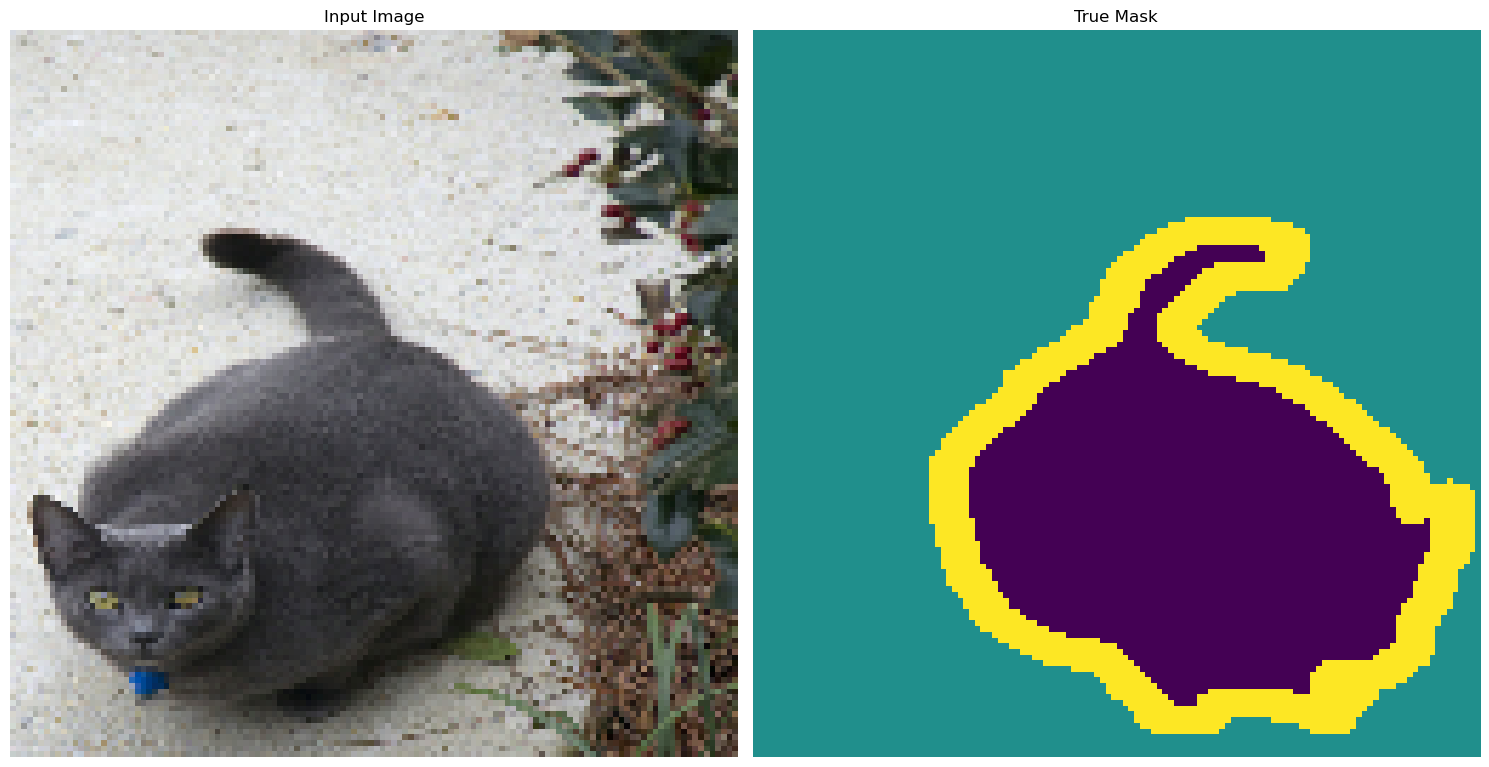

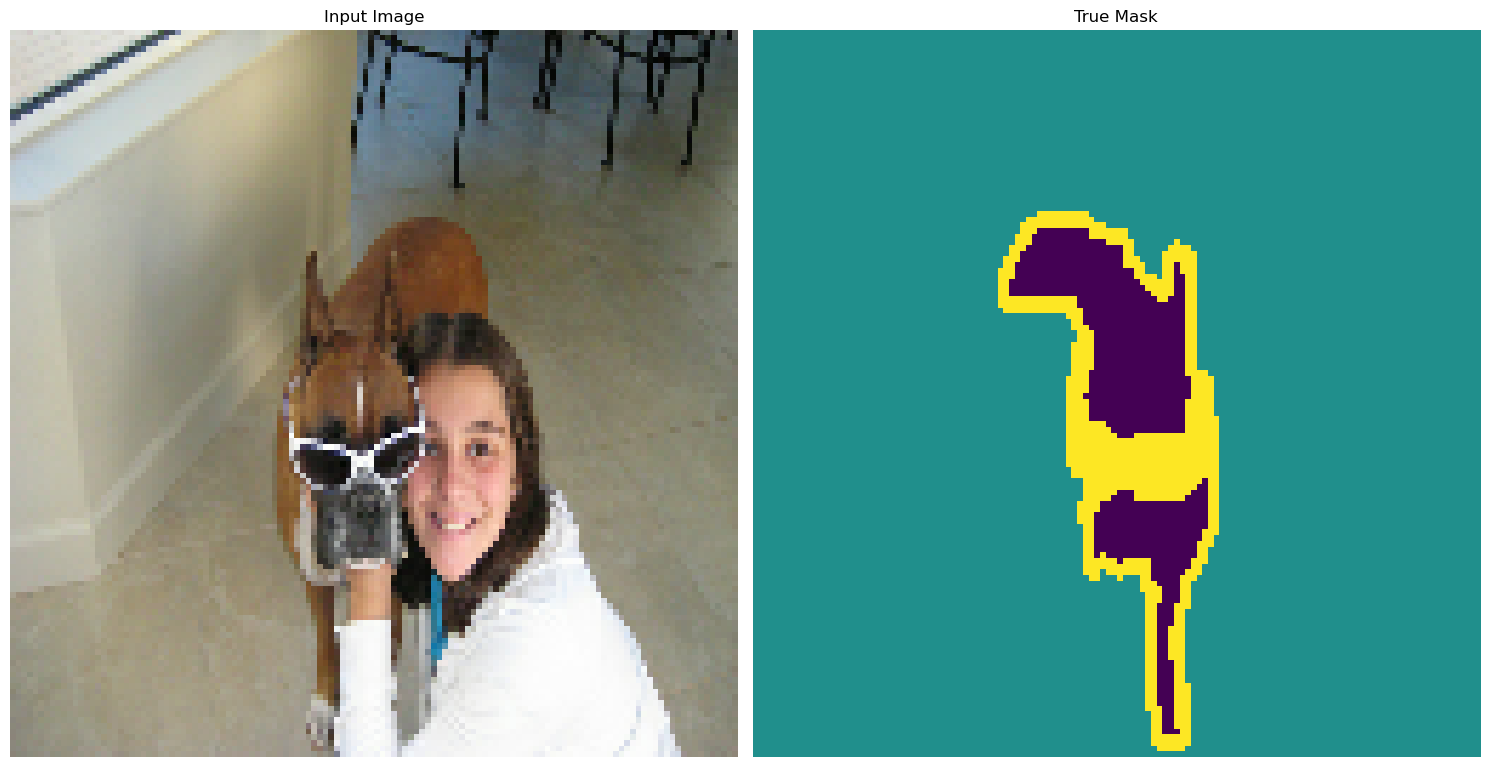

In [20]:
for images, masks in train_batches.take(2):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])

#### Define the Model

The model being used here is a modified U-Net. A U-Net consists of an encoder(downsampler) and decoder(upsampler). To learn robust features and reduce the number of trainable parameters, use a pretrained model-MobileNetV2-as the encoder. For the decoder, you will use the upsample block, which is already implemeted in the pix2pix example in the TensorFlow Examples repo.

The encoder is a pretrained MobileNetV2 model. You will use the model from tf.keras.applications. The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu', # 64x64
    'block_3_expand_relu', # 32x32
    'block_6_expand_relu', # 16x16
    'block_13_expand_relu', # 8x8
    'block_16_project', # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# creatre the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

The decoder/upsample is simply a series of upsample blocks implemeted in TensorFLow Examples